# Input information:

################################### **Given Data / Problem Statement** #################################

### Calculating credit worthiness for rural India

**Context**

In Banking industry, loan applications are generally approved after a thorough background check of the
customer's repayment capabilities. Credit Score plays a significant role in identifying customer's financial
behavior (specifically default). However, people belonging to rural India don't have credit score and it is difficult to do a direct assessment.

The accompanying file trainingData.csv contains some of the information that is collected for loan applications of rural customers. **We need to understand the maximum repayment capability of customers which can be used to grant them the desired amount.**

Note keyword **default** meaning is failure to fulfil an obligation, especially to repay a loan or appear in a law court. "the company will have to restructure its debts to avoid default"

**Description of variables:**
 - **Id:** Primary Key
 - **Personal Details:** city, age, sex, social_class
 - **Financial Details:** primary_business, secondary_business, annual_income, monthly_expenses,
    old_dependents, young_dependents
 - **House Details:** home_ownership, type_of_house, occupants_count, house_area, sanitary_availability,   water_availability
 - **Loan Details:** loan_purpose, loan_tenure, loan_installments, loan_amount (these contain loan details of loans that have been previously given, and which have been repaid)

**Problems:**
- Do a descriptive analysis of all the variables.
- There is a new customer who needs a loan. Which models will be best suited to predict the loan_amount that can be granted to the customer?
- Build a model to predict the maximum loan_amount that can be granted to the customer. Which all variables are good predictors?
- Build atleast one model from scratch that fits this data, without using any third party packages like sklearn, glm, lm, rpart, etc. You are free to use linear algebra packages like scipy, numpy or any Basic Linear Algebra Subprograms (blas) derivative. We would be more interested in the convergence of the algorithm rather than the prediction accuracy.
- Is loan_purpose a significant predictor? The business has insisted on using loan_purpose as a predictor. If it is not already a significant contributor, can we still modify the model to include it?
- How will you measure the fitness of the model? Which metrics (accuracy, recall, etc.) are most relevant?

**Expectation:**
- Attempt to solve all the problems. This will include doing some statistical analysis and model building (using Python). The code should be documented.
- Share the Python code, along with a small document or presentation describing your approach.
- Can reach TW regarding any question at below contact, might have regarding the exercise.

##############################################################################################

################################### **EXPECTED OUTCOME of the TASK** ##########################################

**Objective:** Calculating credit worthiness for rural India.

- Solve all the problems as stated in the above section of Problems section.
- Statistical analysis and model building (using Python).
- Share the Python code.
- Small document or presentation describing the approach.
- Submit your code within three-five days of receiving this task.

##############################################################################################m

# Contents

################################### **Contents** ###############################################

## Contents

- **Section-1:**  Do a descriptive analysis of all the variables.

- **Section-2:** There is a new customer who needs a loan. Which models will be best suited to predict the loan_amount that can be granted to the customer?

- **Section-3:** Build a model to predict the maximum loan_amount that can be granted to the customer. Which all variables are good predictors?

- **Section-4:** Build at least one model from scratch that fits this data, without using any third-party packages like sklearn, glm, lm, rpart, etc. You are free to use linear algebra packages like scipy, numpy or any blas derivative. We would be more interested in the convergence of the algorithm rather than the prediction accuracy.

- **Section-5:** Is loan_purpose a significant predictor? The business has insisted on using loan_purpose as a predictor. If it is not already a significant contributor, can we still modify the model to include it?

- **Section-6:** How will you measure the fitness of the model? Which metrics (accuracy, recall, etc.) are most relevant?

##############################################################################################m

# Section-1:  Do a descriptive analysis of all the variables.

# INPUT DATA & LIBRARIES

#### Setting up working directory

In [1]:
# Setting working directory
import os
os.chdir(r"C:\Users\VK\AI\PROJECTS\somename")
print(os.getcwd())

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\VK\\AI\\PROJECTS\\somename'

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'backup-TW-wip',
 'Cleaned_trainingData_for_assignment-Master-copy_1.csv',
 'Cleaned_trainingData_for_assignment.csv',
 'Cleaned_trainingData_for_assignment_age_anninc_mothex_hosear.csv',
 'Cleaned_trainingData_for_assignment_Mater_copyy_2.csv',
 'CV_THOUGHTWORKS.docx',
 'DELIVERY-TW_08062020',
 'Docs',
 'DS_Store',
 'Exercise.pdf',
 'MAIN.ipynb',
 'MASTER',
 'myimage.png',
 'Report-TW.docx',
 'Report-TW.pdf',
 'SREENI-VenkateshSulibhavi-Friend-Gmail - Hi Srini.pdf',
 'THOUGHTWORKS-DELIVERY_08062020',
 'trainingData.csv',
 'trainingData_for_assignment.csv',
 'TW_Calc_Credit_Worthiness_for_Rural_India.ipynb']

#### Import libraries

In [3]:
## import required packages
import os
import time
import random

import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import skew

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #Visualization

import re

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.impute import SimpleImputer


from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings(action='ignore')

### Data Loading...

#### Given Data from TW

In [4]:
# ### 
# def read_dataset():
#     return pd.read_csv('trainingData_for_assignment.csv')
# df = read_dataset() # function call

In [5]:
# As recieved data (to keep original data preserved)
banking_trainingdata = pd.read_csv('trainingData_for_assignment.csv')
banking_trainingdata.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [6]:
predictor_feature = ['Id', 
     'city', 'age', 'sex', 'social_class',
     'primary_business', 'secondary_business', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents',
     'home_ownership', 'type_of_house', 'occupants_count', 'house_area', 'sanitary_availability', 'water_availabity',
     'loan_purpose', 'loan_tenure', 'loan_installments',
    ]

target_feature = ['loan_amount']

#### 'loan_amount' is the target variable

# Data Cleaning Starts

## SECTION-A : Descriptive analysis of all the variables.

#### 1.0 EDA - DISCRIPTIVE STATISTICS (Initial overview)

#### Working copy of dataset

In [7]:
# Working copy
df = banking_trainingdata.copy()

In [8]:
#data.drop(index=True)
df.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


**Note:** Considering the problem statement and objective of the problem given the **Loan amount** feature is considered as the TARGET FEATURE. As target feature is continuous in nature it ultimatly turn out to be a **regression domain specific problem or task.** 

- In **real time** we need to sit with all the **stakeholders/client/business_expert_leaders** to take **input feature importance** and **Target variable information** well ahead before data pre-processing. 

#### Data description or summary or data_overview

In [9]:
# df.shape[0], df.shape[1]
df.shape

(40000, 21)

**There are 40000 rows/records and 21 columns/features including both predictors and target.**

**Data Frames attributes**

In [10]:
# print(df.axes) # list the row labels and column names
# print(df.values) # numpy representation of the data
# print(df.ndim) # number of dimensions 2
# print(df.size) # number of elements 840000
# print(df.shape) # return a tuple representing the dimensionality (40000, 21)

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  40000
Columns  :  21

Features : 
 ['Id', 'city', 'age', 'sex', 'social_class', 'primary_business', 'secondary_business', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house', 'occupants_count', 'house_area', 'sanitary_availability', 'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments', 'loan_amount']

Missing values :   19066

Unique values :  
 Id                       40000
city                       856
age                         62
sex                          3
social_class               519
primary_business           441
secondary_business           5
annual_income              359
monthly_expenses           260
old_dependents               4
young_dependents             8
home_ownership               2
type_of_house                3
occupants_count             23
house_area                 391
sanitary_availability        3
water_availabity             4
loan_purpose                37
loan_te

In [11]:
print(df.columns.to_list())
# print(len(df.columns.to_list()))

['Id', 'city', 'age', 'sex', 'social_class', 'primary_business', 'secondary_business', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house', 'occupants_count', 'house_area', 'sanitary_availability', 'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments', 'loan_amount']


In [12]:
#This this used to get feature importance in RF Regressor model
# names = ['Id', 'city', 'age', 'sex', 'social_class', 'primary_business', 'secondary_business', 'annual_income', 
#          'monthly_expenses', 'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house', 'occupants_count', 
#          'house_area', 'sanitary_availability', 'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments', 
#          'loan_amount']

names = ['age', 'sex', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'home_ownership', 
         'type_of_house', 'occupants_count', 'house_area', 'sanitary_availability', 'water_availabity', 'loan_purpose', 
         'loan_tenure', 'loan_installments']

names_index = names[:]

In [13]:
# Sub-categorizing the description of variables as per problem statement

primary_key = ['Id']
personal_details = ['city', 'age', 'sex', 'social_class']
financial_details = ['primary_business', 'secondary_business', 'annual_income', 'monthly_expenses', 
                     'old_dependents', 'young_dependents']
house_details = ['home_ownership', 'type_of_house', 'occupants_count', 'house_area', 
                 'sanitary_availability', 'water_availabity']
loan_details = ['loan_purpose', 'loan_tenure', 'loan_installments', 'loan_amount']

print(len(primary_key)+len(personal_details)+len(financial_details)+len(house_details)+len(loan_details))

21


In [14]:
# df.describe(include='all')
# df.describe(include=np.object)

# df.describe(include=np.float)
# df.describe(include=np.integer)

# df.describe(include=np.number)

# df.describe().T

df.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,40000.00000,40000.00000,4.000000e+04,39880.000000,40000.000000,40000.00000,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000,40000.000000,40000.000000,4.000000e+04
mean,20000.50000,55.15990,3.764021e+04,3810.875401,0.044900,1.13710,0.972489,26.641000,552.804750,0.686369,0.753216,12.032225,21.761175,8.412593e+03
std,11547.14972,3830.35566,2.873912e+04,4592.958009,0.222003,1.07384,0.163568,4749.995485,4596.921905,0.464028,0.255337,1.367473,16.682458,1.359694e+04
min,1.00000,2.00000,0.000000e+00,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000e+02
25%,10000.75000,29.00000,1.440000e+04,2500.000000,0.000000,0.00000,1.000000,2.000000,200.000000,0.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20000.50000,35.00000,3.600000e+04,3500.000000,0.000000,1.00000,1.000000,3.000000,400.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30000.25000,42.00000,5.600000e+04,4000.000000,0.000000,2.00000,1.000000,4.000000,600.000000,1.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.00000,766105.00000,1.200000e+06,240000.000000,3.000000,7.00000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06


In [15]:
# df.dtypes
# print("Here's the dimensions of our data frame:\n", df.shape)
# print("Here's the data types of our columns:\n",df.dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
Id                       40000 non-null int64
city                     38136 non-null object
age                      40000 non-null int64
sex                      40000 non-null object
social_class             34745 non-null object
primary_business         39974 non-null object
secondary_business       34759 non-null object
annual_income            40000 non-null float64
monthly_expenses         39880 non-null float64
old_dependents           40000 non-null int64
young_dependents         40000 non-null int64
home_ownership           39621 non-null float64
type_of_house            39306 non-null object
occupants_count          40000 non-null int64
house_area               40000 non-null float64
sanitary_availability    39792 non-null float64
water_availabity         34747 non-null float64
loan_purpose             39974 non-null object
loan_tenure              40000 non-null int6

In [16]:
#Count of data type features
df.dtypes.value_counts()

object     7
int64      7
float64    7
dtype: int64

In [17]:
#List of numerical type features
numerical_features = df.select_dtypes(include=np.number).columns.to_list()
print("Total number of numerical features {}".format(len(df.select_dtypes(include=np.number).columns.to_list())))
print()
print(numerical_features)

Total number of numerical features 14

['Id', 'age', 'annual_income', 'monthly_expenses', 'old_dependents', 'young_dependents', 'home_ownership', 'occupants_count', 'house_area', 'sanitary_availability', 'water_availabity', 'loan_tenure', 'loan_installments', 'loan_amount']


In [18]:
# # Histogram plot
# df[numerical_features].hist(figsize=(15,20))
# plt.show()

In [19]:
# #### correlation check
# plt.figure(figsize=(10,10))
# sns.heatmap(df[numerical_features].corr())

In [20]:
# sns.pairplot(df[numerical_features]) 
# df.corr()

In [21]:
# sns.set_context('poster',font_scale=0.5)
# sns.pairplot(df) #to understand the relationship better

In [22]:
# plt.figure(figsize=(16,8))
# sns.pairplot(data=df, hue='loan_amount', palette='Set1')
# plt.show()

In [23]:
# sns.pairplot(df[numerical_features])

#### Pearson Correlation

In [24]:
# #### correlation matrix check which works only on numerical predictor / independent feature
# df.corr()

In [25]:
# ### correlation
# plt.figure(figsize=(9,5))
# sns.heatmap(df.drop('Id', axis = 1).corr().round(2), annot=True)

In [26]:
# pearsoncorr = df.corr()
# sns.heatmap(pearsoncorr, xticklabels=pearsoncorr.columns, 
#            yticklabels=pearsoncorr.columns, 
#            cmap='RdBu_r', annot=True, linewidth=0.8)

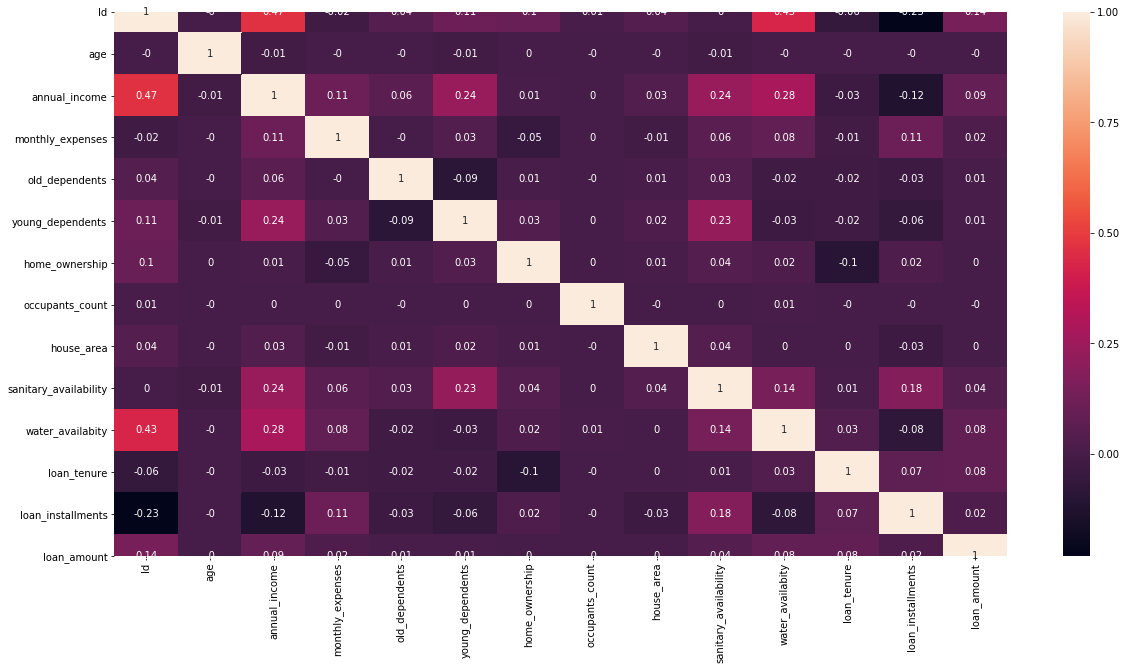

In [27]:
#check correltion matrix - to check the strength of variation between two variables
correlation_matrix= df.corr().round(2)
fgr, ax = plt.subplots(figsize =(20, 10)) 
import seaborn as sns
c = sns.heatmap(data=correlation_matrix, annot=True)
fgr.savefig("myimage.png")

 ```
 - loan_tenure & loan_installments are having correlation comparitively but not in high strength
  - drop??
 ```

In [28]:
#### 
# what to do if two features are strongly correlated??
#  - Keep one feature which is strongly correlated and rest features remove

# Is it good if any feature is strongly correlated with target variable?
# yes

# What if among features A, B, ....Z, A is correlated with B, B is correlated with E, E is correlated with F, 
# F is correlated with A ?
# - multi-collinearity
# - handling through VIF check ; if VIF > 5, remove that feature
# VIF (Variance inflation factor)

**Observation:** According to pair plot and correlation matrix values, it is observed that there was **no strong correlation between the predictor features.** However, there is a slight correlation between loan tenure and loan instalments. **There is no correlation between the predictor features.**

In [29]:
#List of float type features
float_features = df.select_dtypes(include=np.float).columns.to_list()
print("Total number of numerical features {}".format(len(df.select_dtypes(include=np.float).columns.to_list())))
print()
print(float_features)

Total number of numerical features 7

['annual_income', 'monthly_expenses', 'home_ownership', 'house_area', 'sanitary_availability', 'water_availabity', 'loan_amount']


In [30]:
#List of integer type features
int_features = df.select_dtypes(include=np.integer).columns.to_list()
print("Total number of integer features {}".format(len(df.select_dtypes(include=np.integer).columns.to_list())))
print()
print(int_features)

Total number of integer features 7

['Id', 'age', 'old_dependents', 'young_dependents', 'occupants_count', 'loan_tenure', 'loan_installments']


In [31]:
#List of categorical type features
categorical_features = df.select_dtypes(include=np.object).columns.to_list()
print("Total number of categorical features {}".format(len(df.select_dtypes(include=np.object).columns.to_list())))
print()
print(categorical_features)

Total number of categorical features 7

['city', 'sex', 'social_class', 'primary_business', 'secondary_business', 'type_of_house', 'loan_purpose']


**Note: There are total 21 features including target (Categorical type = 07, Float type= 07 & Int type = 07)**

In [32]:
# for col in categorical_features:
#     print('col: {}; unique values: {}'.format(col,df[col].unique()))

In [33]:
# # Visualization of categorical feature distribution
# for each in categorical_features:
#     sns.countplot(each, data = df)
#     plt.show()

In [34]:
# for each in categorical_features:
#     sns.countplot(each, hue="loan_amount", data=df)
#     plt.show()

#### Each feature unique value counts and unique value listing

In [35]:
# for each in df.columns.to_list():
#     print("******************")
#     print(each, "," , str(df[each].nunique()),  "," , df[each].unique())
#     print("******************")
#     print()

#### Missing values count

In [36]:
### missing values:
round(df.isnull().sum()/df.shape[0]*100, 2)

Id                        0.00
city                      4.66
age                       0.00
sex                       0.00
social_class             13.14
primary_business          0.06
secondary_business       13.10
annual_income             0.00
monthly_expenses          0.30
old_dependents            0.00
young_dependents          0.00
home_ownership            0.95
type_of_house             1.74
occupants_count           0.00
house_area                0.00
sanitary_availability     0.52
water_availabity         13.13
loan_purpose              0.06
loan_tenure               0.00
loan_installments         0.00
loan_amount               0.00
dtype: float64

- Observations from missing summary:
  - We cannot drop any feature from the dataset becoz it has missing values <= 70% (This is initial osevation)
  - will handle all features of dataset by filling with appropriate mean/median/mode/OHE etc 

## ways to handle missing values
        1. dropping rows/columns
            a. if above and equal 70% missing values, drop the columns
            b. check proportion wrt to target categories
        2. handling 
          a. filing (mean, median, mode, random values between 2 standard deviation)
          b. predicting 

In [37]:
# Missing values handling
#Total no. of missing values
print("Total number of missing values in the data_set:",df.isnull().sum().values.sum())
print("Total %ge of missing values in the data_set:",round((df.isnull().sum().values.sum()/df.shape[0])*100,2))

Total number of missing values in the data_set: 19066
Total %ge of missing values in the data_set: 47.66


**OBSERVATION:** IF WE NEGLECT ALL MISSING VALUE RECORDS, THEN WE MAY **END UP IN ALMOST 50% OF DATA OUT OF OUR ANALYSIS SCOPE.** SO **DATA IMPUTATION** IS NEEDED TO GET REALISTIC SOLUTION FOR THE PROBLEM STATEMENT STATED.

In [38]:
#Total no. of missing values relevant to each feature
# df.apply(lambda x: x.isnull().sum())
# df.isnull().sum().head()
df.isnull().sum()

Id                          0
city                     1864
age                         0
sex                         0
social_class             5255
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

In [39]:
#Total percentage of missing values relevant to each feature
print(round((df.isnull().sum()/df.shape[0])*100, 2))

Id                        0.00
city                      4.66
age                       0.00
sex                       0.00
social_class             13.14
primary_business          0.06
secondary_business       13.10
annual_income             0.00
monthly_expenses          0.30
old_dependents            0.00
young_dependents          0.00
home_ownership            0.95
type_of_house             1.74
occupants_count           0.00
house_area                0.00
sanitary_availability     0.52
water_availabity         13.13
loan_purpose              0.06
loan_tenure               0.00
loan_installments         0.00
loan_amount               0.00
dtype: float64


**OBSERVATION: Categorical and floating type features experience missing values problem. There are no missing values in integer type features.**

# Handling missing values & Encoding string values to integer values

**Note: Usually most of the project execution time (~80% ) consumes in EDA or data preprocessing or data cleaning activity and optimisation/hyperparameter tuning.**

We can handle if any missing values in the dataset provided by replacing the values with the following aggregate values to name a few but not limited to the only following list. There are other optins too but most frequent tecnuques are as follows:
- Mean
- Mode (most frequent)
- Median
- Constant value
- Delete the entire row/column with missing values

There is no rule of thumb to select a specific option, it depends on the data and the problem statement which is intended to solve. To select the best option, the knowledge of both data and the application are needed. Statistical and engineering judgement needed to handle the missing values.

EDA includes these basic checks and handling on the dataset to remove noises.
- Data summary
- Target analysis
- Univariate analysis
    - Histogram
    - Missing values handling
    - Normality check
    - Encoding
    - Outliers handling
    - Dimensionality reduction
- Bivariate analysis
    - Correlation check/multi-collinearity check
    - Pair-plot
    - Scatter plot
    - Outliers handling
    - Box plot

In [40]:
### - If balanced/imbalanced classes needs to be checked (here target feature is Loan amount)

#### Univariate analysis
            -Histogram
            - Missing values handling
            - Normality check
            - Encoding
            - Outliers handling
            - Dimensionality reduction

Exploratory Data Analysis (EDA)
 - Univariate  Analysis
    - Missing values 
    - Normality check
    - Categorical to Numerical data conversion (Encoding)
    - outliers detection
 - Bivariate Analysis
    - correlation check
    - outliers detection
 - Feature Engineering
 - Modeling & parameter evaluation

### Bivariate analysis
    - Correlation check/multi-collinearity check
    - Pair-plot
    - Scatter plot
    - Outliers handling

In [41]:
### EDA 
# # univariate analysis
    # # Missing values handling 
    # df.isnull().sum()
# ### How do we handle missing values?
    # #  - dropping (rows/columns)
    # #  - filling (mean/median/mode/random values(between +-2sigma (standard deviation)))
    # #  - filling with a predicitive model

# ### if missing values in rows; should we drop all the rows with any missing values? (NO/depends)
# ## 1) could discard significant columns info
# ## 2) could discard target records info  

# ### column - wise
# ## 1) percentage of missing of missing values in each column
# ## 2) column significant wrt. target 
# ## 3) if missing values above or equal to 70%, drop the column
# ###  a) if below 70%, what are the cases possible?
# #### if continuous: mean|median? if percentage of misssing values is minimal then only, use mean or median approach else stick to predictive model or filling with ransom numbers between 2 standard deviations. 
# #### if categrorical/numerical discrete: mode? (defination of outliers in categorical data)

In [42]:
# Exploratory Data Analysis (EDA)
# Univariate Analysis
# Missing values
# Normality check
# Categorical to Numerical data conversion (Encoding)
# outliers detection
# Bivariate Analysis
# correlation check
# outliers detection

In [43]:
# ## 
# data -> 
# 1.nominal data (OHE)
# 2. interval/rank data (label encoding)

### EDA
    - missing values handling
    - correlation check
    - outliers detection
    - normalisation
    - encoding 
    - target analysis
    
### preprocessing 
    - scaling

#### Encoding handling

categorical_features 
Index(['Id', 'sex',], dtype='object')

 - drop 'Id',  becoz Id is nominal features
 - 'Sex' - handle it replace male with '1' and female with '0'
 - 'loan_purpose' - handle it but how?
 
 
 Types of encoding
   - Label encoding Ex: {'excellent':3,'good':2, 'bad':1}
   - One hot encoding (OHE) Ex: {'male':1 , 'female:'0}: {'male':001 , 'female':010, 'other':100}

### Normality check

In [44]:
# # First check loan amount feature for normality as below code:
# sns.distplot(df.loan_amount)
# #if loan amount looks balanced, no need to handle for normality.

# #Otherwise use below code if skew exists:
# sns.distplot(np.log1p(df.loan_amount))

In [45]:
# # Why always normal graph ?? why not other form of graphs?? 
## Answer is ML algorithms are designed to work most effectively on normal distributed data

# ## if positively skewed -> log, sqrt, 1/3root,
# ## if negatively skewed  -> power (2,3,4,5..)

# from scipy.stats import skew

# numerical_features   = df.select_dtypes(include=np.number).columns
# categorical_features = df.select_dtypes(include=np.object).columns
# # print(numerical_features)
# # print(categorical_features)

# skew(df[numerical_features], nan_policy='omit') ## find out threshold for skewness

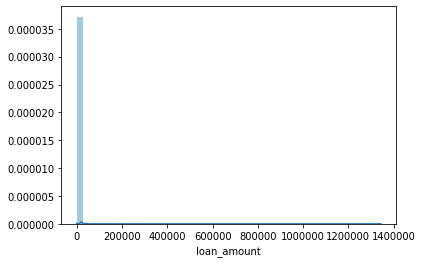

In [46]:
sns.distplot(df.loan_amount)

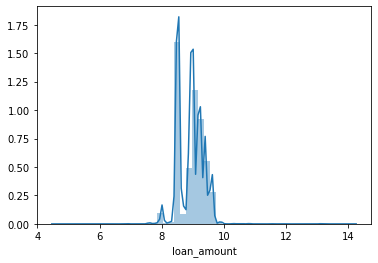

In [47]:
# taking log transformation on loan_amount
sns.distplot(np.log1p(df.loan_amount)) # log1p -> adds 1 to entire data and then takes log

In [48]:
# ##  Normality check
# numerical_features_temp = df.drop('loan_amount', axis = 1).select_dtypes(include = np.number).columns
# categorical_features_temp = df.select_dtypes(include=np.object).columns
# print(numerical_features_temp)
# print(categorical_features_temp)

In [49]:
# df[numerical_features_temp].hist(figsize=(15,20))
# plt.show()

- From the histogram of numerical features it is evident that most of the features have outliers exists, which needs an imputation process.

In [50]:
# for each in categorical_features_temp:
#     sns.countplot(each, data = df)
#     plt.show()

- zero variance and correlation should be checked
```
columns to be dropped
'Id' => this is nominal data 
'city', 'social_class',  & 'loan_purpose'  (further analysis required)
```

In [51]:
# # dropping columns
# df.drop(['Id','city','social_class','loan_purpose'], axis = 1, inplace = True)

In [52]:
# #```
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.impute import SimpleImputer
# from sklearn.compose import make_column_transformer

# ohe = OneHotEncoder()
# imp = SimpleImputer()

# ct = make_column_transformer(
#     (ohe, ['sex','primary_business', 'loan_purpose',]),
#     (imp, ['age', 'occupants_count']),
#     reminder = 'passthrough')
# #```

In [53]:
dummy_df  = skew(df[numerical_features])
_ = pd.concat([pd.DataFrame(numerical_features, columns = ['Features']), 
          pd.DataFrame(dummy_df, columns = ['Skewness'])], axis = 1)
_ .sort_values('Skewness', ascending = False)

# for positive skewness: log, sqrt root, 1/3rd root...
# for negative skewness: square, cube, ....

,Features,Skewness
7,occupants_count,1.999912e+02
1,age,1.999908e+02
8,house_area,1.237166e+02
13,loan_amount,5.787093e+01
11,loan_tenure,1.768585e+01
4,old_dependents,5.257352e+00
2,annual_income,4.978471e+00
12,loan_installments,1.103430e+00
5,young_dependents,5.940734e-01
0,Id,-3.450570e-17


# 1.01: 'Id' Feature

In [54]:
# df.Id.dtype

In [55]:
# Setting 'Id_number' as our index
# df.set_index(['Id'], inplace = True) 

In [56]:
df.Id.nunique()

40000

In [57]:
# del df['Id']

**Note:** Id feature will be dropped due to **nominal data**

# 1.02: city Feature Imputation

In [58]:
df.city.dtype

dtype('O')

In [59]:
# for each in df.city.unique():
#     print(each,"=", df[df.city==each].shape[0]/df.shape[0])

In [60]:
print(df.city.nunique())
# print(df.social_class.unique())

856


In [61]:
df.city.isnull().sum()

1864

In [62]:
df.city.value_counts().values.sum()

38136

In [63]:
df.city.value_counts().sort_values(ascending=False).head(10)

Pusad            3154
Bahoriband       1979
PUSAD            1776
Shantipur        1727
Imphal           1699
Mathurapur       1361
SANDESHKHALI     1087
Joynagar          993
Gwalior           952
Kozhinjampara     897
Name: city, dtype: int64

In [64]:
df['city'].fillna('unknown', inplace=True)

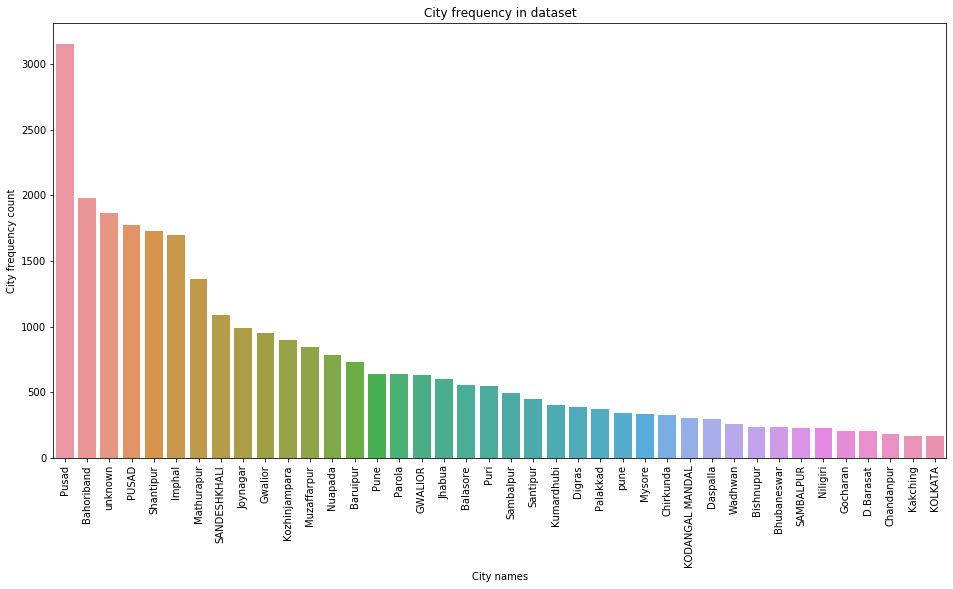

In [65]:
plt.figure(figsize=(16,8))
sns.barplot(x=df.city.value_counts().sort_values(ascending=False).head(40).index, 
            y=df.city.value_counts().sort_values(ascending=False).head(40))
plt.xticks(rotation=90)
plt.title("City frequency in dataset")
plt.xlabel('City names')
plt.ylabel('City frequency count')
plt.show()

**There are 856 cities in the data set. The most frequest 40 cities are shown in the above visualization plot. At the moment we will drop this feature. Depending on stakeholders and business understanding if required we will consider this feature in ML model.**

In [66]:
# df.drop(columns=['city'], axis=1, inplace=True)

In [67]:
df.shape

(40000, 21)

In [68]:
print(df.isnull().sum())

Id                          0
city                        0
age                         0
sex                         0
social_class             5255
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64


In [69]:
df.head()

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,unknown,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [70]:
print("Total no. of city feature: ",df.city.nunique())

Total no. of city feature:  857


**Note:** city feature is dropped which may not add much benefits from analytics prospective but depending on client/stakeholders concern it may be considered.

In [71]:
#####******************reducing city subcategories****************#####

In [72]:
# print(df.city.value_counts().head(40))
# print(df.city.nunique())
# print(df.city.unique())

In [73]:
df['city'].replace('Plakkad','Palakkad',inplace=True)

df['city'].replace('Niligiri','Nilgiri',inplace=True)
df['city'].replace('Nilgir','Nilgiri',inplace=True)
df['city'].replace('Niligir','Nilgiri',inplace=True)
df['city'].replace('nilgiri','Nilgiri',inplace=True)

df['city'].replace('KOLKAT','Kolkata',inplace=True)
df['city'].replace('KOLKATA','Kolkata',inplace=True)

df['city'].replace('COIMBATORE','Coimbatore',inplace=True)

In [74]:
#####**********************************#####

In [75]:
# df.city.value_counts()

In [76]:
df.city.value_counts().sort_values(ascending=False).head()

Pusad         3154
Bahoriband    1979
unknown       1864
PUSAD         1776
Shantipur     1727
Name: city, dtype: int64

In [77]:
print(df.city.nunique())
# print(df.city.unique())

849


**By just matching/correcting few city spelling differences the city sub categories reduced to (856-849) = 7 number. There is god scope to do like this and we can make the city feature eligible to include in ML model.**

**Note:** Still there is lot of scope to reduce the the city subcategories. Either we can use manual or REGEX technique to find and match the similar cities in the dataset.

**Most frequent or repeated present city in the records is Pusad**

**Note:** city feature is dropped which may not add much benefits from analytics prospective but depending on client/stakeholders concern it may be considered.

**NOTE: Althought there is an option to add as a replacement for missing city by using most frequent occuring city (Pusad) in the data set. This can be done by asking client/stakeholders later stages. At this moment worth replacing missing city records as unknown to retain records.**

In [78]:
#####*****************Frequency OneHOT ENCODE*********************************#####

In [79]:
####### Following work (i.e, city feature imputation) used if and only if business suggest we must use this feature #######

- If business wants to add **city feature into the model** then following approch is used, which is called **Frequency OneHOT ENCODE.**
- This method is preferred when the **column has too many unique values in it.**

In [80]:
# df.city.unique()
df.city.nunique()

849

- There are total **857 city names** in **city feature** of the data set. If client/business wants to add city feature in the model, then it is absolutly necessary to do feature engineering. **Here some top frequent occuring cities are considered as a POC approach.**

In [81]:
# Here some top frequent occuring cities are considered but depending on necessity we can add or reduce
# df.city.value_counts().head(20)
# df.city.value_counts().head(20)[0:20]
# df.city.value_counts().head(20).index
# df.city.value_counts().head(20).index.to_list()
print(df.city.value_counts().head(20).index.to_list())

['Pusad', 'Bahoriband', 'unknown', 'PUSAD', 'Shantipur', 'Imphal', 'Mathurapur', 'SANDESHKHALI', 'Joynagar', 'Gwalior', 'Kozhinjampara', 'Muzaffarpur', 'Nuapada', 'Baruipur', 'Pune', 'Parola', 'GWALIOR', 'Jhabua', 'Balasore', 'Puri']


In [82]:
temp = ['Pusad', 'Bahoriband', 'unknown', 'PUSAD', 'Shantipur', 'Imphal', 'Mathurapur', 'SANDESHKHALI', 'Joynagar', 
        'Gwalior', 'Kozhinjampara', 'Muzaffarpur', 'Nuapada', 'Baruipur', 'Pune', 'Parola', 'GWALIOR', 'Jhabua', 'Balasore', 'Puri']

In [83]:
df.city = df.city.apply(lambda x : x if x in temp else 'unknown_city')

In [84]:
df.city.value_counts().head(6)

unknown_city    16546
Pusad            3154
Bahoriband       1979
unknown          1864
PUSAD            1776
Shantipur        1727
Name: city, dtype: int64

In [85]:
df_city_new = pd.get_dummies(df.city, prefix='city', drop_first=True)

In [86]:
df = pd.concat([df, df_city_new], axis=1)

In [87]:
df = df.drop(columns = ['city'], axis=1)

In [88]:
#####**************************************************#####

# 1.03: Age Feature Imputation

#### Invalid age entry elimination

In [89]:
# df.age.dtypes

In [90]:
# df.shape

In [91]:
# # Inalid age entry elimination
# df['age']=np.where(df['age'] < 0, 'nan', df['age'])
# df.head()

In [92]:
# df.shape

In [93]:
# df.tail()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 62 Text xticklabel objects>)

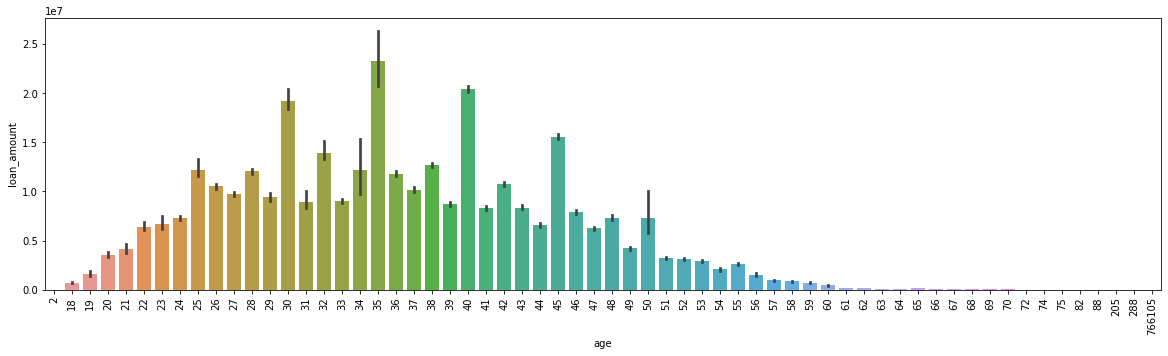

In [94]:
fig = plt.figure(figsize=(20,5))
sns.barplot(x='age',y='loan_amount',data=df,estimator=sum)
plt.xticks(rotation='vertical')

**Preliminary observations from statistical descriptive summary:**
- **age** predictor ranges from min. 1 to max. 766105. **The max age is unrealistic which needs attention.**

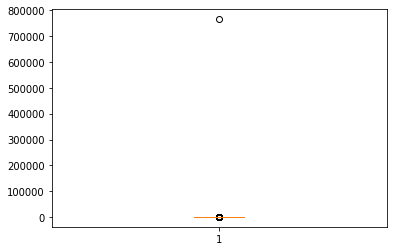

In [95]:
#personal_details
plt.boxplot(df['age'])
plt.show()

**Observations:** Outlier exists in age feature
- Age feature needs resonable values modification

In [96]:
# df.groupby('age')[['loan_amount']].mean().sort_values(by='loan_amount', ascending=False).head(10)

In [97]:
df[['age', 'loan_amount']].agg(['min','mean','max'])

,age,loan_amount
min,2.0000,1.000000e+02
mean,55.1599,8.412593e+03
max,766105.0000,1.343000e+06


In [98]:
#Checking different percentile
# pd.DataFrame(df["age"]).describe(percentiles=[1, 0.99,0.9,0.75,0.50,0.30,0.10,0.01])

In [99]:
# df.age.max() # 766105
# df.age.min() # 2
df.age.value_counts().sort_values(ascending=True).head(10)

205       1
766105    1
88        1
72        1
75        1
74        1
288       1
82        1
2         2
66        3
Name: age, dtype: int64

In [100]:
df[(df.age == 766105) | (df.age == 205) | (df.age == 288)]

,Id,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,...,city_Nuapada,city_PUSAD,city_Parola,city_Pune,city_Puri,city_Pusad,city_SANDESHKHALI,city_Shantipur,city_unknown,city_unknown_city
9337,9338,205,F,NaN,Provision store,NaN,0.0,3000.0,0,0,...,0,0,0,0,0,1,0,0,0,0
10236,10237,766105,F,NaN,Dry fish selling,NaN,0.0,1000.0,0,0,...,0,0,0,0,0,0,0,0,0,1
11993,11994,288,F,NaN,Spices and condiments business,NaN,0.0,3900.0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [101]:
df.drop(index=[9337, 10236, 11993], inplace=True)

In [102]:
df.shape

(39997, 40)

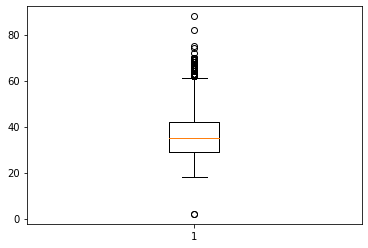

In [103]:
#personal_details
plt.boxplot(df['age'])
plt.show()

In [104]:
# Detecting outlier
print(df.age.min())
print(df.age.max())
print(df.age.median())
print(df.age.quantile(0.25))
print(df.age.quantile(0.75))
IQR = df.age.quantile(0.75) - df.age.quantile(0.25)
print(IQR)

UQR = df.age.quantile(0.75) + 1.5 * IQR
LQR = df.age.quantile(0.25) - 1.5 * IQR
print(LQR)
print(UQR)

2
88
35.0
29.0
42.0
13.0
9.5
61.5


In [105]:
# df[(df.age < 9.5) | (df.age > 61.5)]

In [106]:
df[(df.age < 9.5) | (df.age > 61.5)].index

Int64Index([ 4587,  6929,  6949,  6963,  7339,  7952,  8012,  8324,  8635,
            10762, 11732, 11786, 11837, 11860, 14235, 16042, 16057, 16058,
            16096, 18507, 19021, 19627, 21163, 21194, 21231, 21564, 21584,
            21666, 21692, 21696, 22496, 23104, 23115, 23136, 23161, 23163,
            23830, 24516, 24907, 25915, 26079, 26424, 26955, 27162, 27633,
            27877, 29864, 30015, 30055, 30555, 30558, 31348, 32547, 32560,
            32616, 33793, 33803, 33847, 35284, 35287, 35540, 35555, 36509,
            36843, 36872, 36876, 36910, 37045, 37902, 38189, 38524, 38746,
            38792, 39071, 39097, 39207, 39242, 39263, 39285, 39331, 39361,
            39369, 39443, 39450, 39464, 39471, 39474, 39478, 39830, 39838,
            39842],
           dtype='int64')

In [107]:
df.drop(index=df[(df.age < 9.5) | (df.age > 61.5)].index, inplace=True)

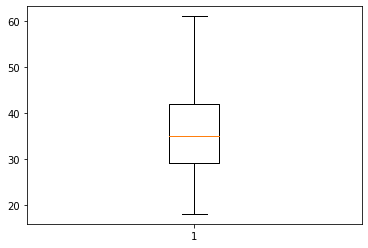

In [108]:
#personal_details
plt.boxplot(df['age'])
plt.show()

**It is evident from boxplot that now age feature is free from OUTLIERS**

In [109]:
print("Min. age:",df.age.min(), "&", "Max. age:",df.age.max())

Min. age: 18 & Max. age: 61


In [110]:
df.shape

(39906, 40)

**Note:** Due to outlier issue in age feature 94 records are dropped

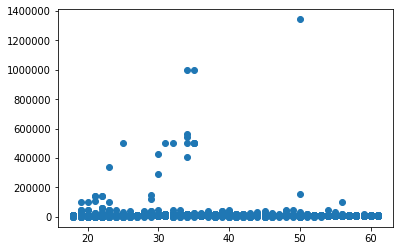

In [111]:
plt.figure
plt.scatter(df.age, df.loan_amount)

**Observation:** There is no correlation between age and loan_amount

# 1.04: sex Feature Imputation

In [112]:
# df.sex.dtype

In [113]:
for each in df.sex.unique():
    print(each,"=", df[df.sex==each].shape[0]/df.shape[0])

F = 0.9409362000701649
M = 0.058888387711121135
TG = 0.00017541221871397784


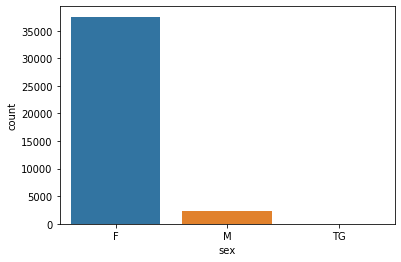

In [114]:
sns.countplot(df['sex'])
plt.show()

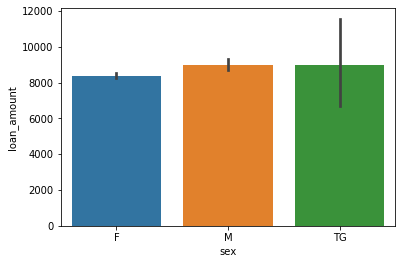

In [115]:
sns.barplot(df.sex, df.loan_amount)

In [116]:
df.sex.value_counts()

F     37549
M      2350
TG        7
Name: sex, dtype: int64

In [117]:
#~ 35000+(F)/~<5000(M)/~0(TG) (cases of 'F', 'M' & 'TG')
## It needs handling imbalanced dataset? using under-sampling/over-sampling (Take a call from client)
# 2350-> M (Minority class)
# 37549-> F (Majority class)
# 7 -> TG (Negligible class)
# SMOTE (Synthetic Minority Over-sampling Technique)
# classimblearn (Implimented after consuting with the business )

In [118]:
df[df.sex == 'TG']

,Id,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,...,city_Nuapada,city_PUSAD,city_Parola,city_Pune,city_Puri,city_Pusad,city_SANDESHKHALI,city_Shantipur,city_unknown,city_unknown_city
6157,6158,26,TG,GC,Poultry farm,none,14400.0,4100.0,0,2,...,0,0,0,0,0,0,0,0,0,0
7034,7035,22,TG,GC,Embroidery work,none,12000.0,4300.0,0,1,...,0,0,0,0,0,0,0,0,0,0
24358,24359,21,TG,ST,Fish rearing,Daily wage labourer,60000.0,4200.0,0,2,...,0,0,0,0,0,0,0,0,1,0
29899,29900,38,TG,Muslim,Fish vendor,none,50000.0,3500.0,0,3,...,0,0,0,1,0,0,0,0,0,0
34763,34764,41,TG,kurbiya,kirana Shop,none,108000.0,6000.0,0,1,...,0,0,0,0,0,0,0,0,0,1
38203,38204,19,TG,hindu,Education Loan,none,36000.0,4000.0,0,0,...,0,0,0,0,0,0,0,0,0,1
38794,38795,20,TG,OBC,Cow Rearing,none,52000.0,2000.0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [119]:
df.drop(df[df.sex == 'TG'].index, inplace=True)

In [120]:
df.sex.value_counts()

F    37549
M     2350
Name: sex, dtype: int64

In [121]:
#####*****************OHE for sex feature*********************************#####

**OHE for sex feature**

In [122]:
# #### Define a function to convert the 'M' to 1 and 'F' to 0 in sex variable
# def targetVarMapping(x):
#     if x == 'no':
#         return 0
#     return 1

# df.sex.map(lambda x : targetVarMapping(x))

In [123]:
# # Target Encoding (M->1, 'F'->0)
# df['sex'] = df.sex.map({'M':1,'F':0}) ## map function
# df_sex = pd.get_dummies(df.sex) ## OHE encoding

In [124]:
# Converted to binary to help later on with models and plots
# df['sex'] = df['sex'].map({'M':1, 'F':0})
df_sex_new = pd.get_dummies(df.sex, prefix='sex', drop_first=True)

In [125]:
df_sex_new.head(3)

,sex_M
0,0
1,0
2,1


In [126]:
df = pd.concat([df, df_sex_new], axis=1)

In [127]:
df = df.drop(columns=['sex'], axis=1)

In [128]:
#####**************************************************#####

In [129]:
df.head()

,Id,age,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,...,city_PUSAD,city_Parola,city_Pune,city_Puri,city_Pusad,city_SANDESHKHALI,city_Shantipur,city_unknown,city_unknown_city,sex_M
0,1,22,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,...,0,0,0,0,0,0,0,0,1,0
1,2,21,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,...,0,0,0,0,0,0,0,0,1,0
2,3,24,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,...,0,0,0,0,0,0,0,0,1,1
3,4,26,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,...,0,0,0,0,0,0,0,1,0,0
4,5,23,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [130]:
df.shape

(39899, 40)

In [131]:
# # sex Encoding (M->1, F->0)
# df['sex'] = df.sex.map({'M':1,'F':0})
# df = pd.get_dummies(df['sex']) ## OHE encoding

In [132]:
# label_encode = LabelEncoder()
# df.sex.unique()
# df['sex'] = label_encode.fit_transform(df['sex'])
# df.sex.unique()

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39899 entries, 0 to 39999
Data columns (total 40 columns):
Id                       39899 non-null int64
age                      39899 non-null int64
social_class             34656 non-null object
primary_business         39873 non-null object
secondary_business       34670 non-null object
annual_income            39899 non-null float64
monthly_expenses         39779 non-null float64
old_dependents           39899 non-null int64
young_dependents         39899 non-null int64
home_ownership           39520 non-null float64
type_of_house            39205 non-null object
occupants_count          39899 non-null int64
house_area               39899 non-null float64
sanitary_availability    39691 non-null float64
water_availabity         34658 non-null float64
loan_purpose             39873 non-null object
loan_tenure              39899 non-null int64
loan_installments        39899 non-null int64
loan_amount              39899 non-null float6

In [134]:
df.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,...,city_PUSAD,city_Parola,city_Pune,city_Puri,city_Pusad,city_SANDESHKHALI,city_Shantipur,city_unknown,city_unknown_city,sex_M
count,39899.000000,39899.000000,3.989900e+04,39779.000000,39899.000000,39899.000000,39520.000000,39899.000000,39899.000000,39691.000000,...,39899.000000,39899.000000,39899.000000,39899.000000,39899.000000,39899.000000,39899.000000,39899.000000,39899.000000,39899.000000
mean,19983.774054,35.934785,3.763195e+04,3813.080947,0.043961,1.139151,0.972470,26.701972,540.261159,0.686957,...,0.044512,0.015815,0.015915,0.013634,0.079025,0.027244,0.043284,0.046643,0.412817,0.058899
std,11543.442368,8.819698,2.875544e+04,4598.075796,0.220104,1.073837,0.163625,4756.003730,3864.255410,0.463792,...,0.206233,0.124761,0.125149,0.115969,0.269780,0.162795,0.203499,0.210875,0.492347,0.235438
min,1.000000,18.000000,0.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9987.500000,29.000000,1.440000e+04,2500.000000,0.000000,0.000000,1.000000,2.000000,200.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19977.000000,35.000000,3.600000e+04,3500.000000,0.000000,1.000000,1.000000,3.000000,400.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29978.500000,42.000000,5.600000e+04,4000.000000,0.000000,2.000000,1.000000,4.000000,600.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,40000.000000,61.000000,1.200000e+06,240000.000000,3.000000,7.000000,1.000000,950000.000000,700000.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
df.head()

,Id,age,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,...,city_PUSAD,city_Parola,city_Pune,city_Puri,city_Pusad,city_SANDESHKHALI,city_Shantipur,city_unknown,city_unknown_city,sex_M
0,1,22,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,...,0,0,0,0,0,0,0,0,1,0
1,2,21,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,...,0,0,0,0,0,0,0,0,1,0
2,3,24,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,...,0,0,0,0,0,0,0,0,1,1
3,4,26,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,...,0,0,0,0,0,0,0,1,0,0
4,5,23,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,...,0,0,0,0,0,0,0,0,0,0


# 1.05: social_class Feature Imputation

In [136]:
df.social_class.dtype

dtype('O')

In [137]:
df.social_class.nunique()

517

In [138]:
# df.social_class.value_counts().sort_values(ascending=False)[0:]
# df.social_class.value_counts().sort_values(ascending=False)[1:]
# df.social_class.value_counts().sort_values(ascending=False)[2:]
# df.social_class.value_counts().sort_values(ascending=False)[31:]  
df.social_class.value_counts().sort_values(ascending=False)[31:].head()

Maratha    153
S.T        153
O.B.C      107
GENL       106
Kuruba      96
Name: social_class, dtype: int64

In [139]:
# for each in df.social_class.unique():
#     print(each,"=", df[df.social_class==each].shape[0]/df.shape[0])

In [140]:
print(df.social_class.nunique())
# print(df.social_class.unique())

517


In [141]:
# df.social_class.unique().tolist()

In [142]:
df.social_class.isnull().sum()

5243

In [143]:
df.social_class.value_counts().values.sum()

34656

In [144]:
df.social_class.value_counts().sort_values(ascending=False).head(10)

OBC               10663
SC                 3135
ST                 2599
General            2299
Muslim             1736
S.C                 950
Minority            892
Hindu               863
GC                  805
Sechudle Caste      769
Name: social_class, dtype: int64

In [145]:
# df[df['social_class'] == 'na']

In [146]:
# #### Fill 'unknown' in all 'social_class' where 'social_class' is null
# df['social_class'].fillna('unknown', inplace=True)

In [147]:
df['social_class'].fillna('unknown', inplace=True)

In [148]:
df['social_class'] = df['social_class'].map(lambda x: x.lower())

In [149]:
# df.social_class.value_counts()
df.social_class.value_counts().sort_values(ascending=False).head(40)

obc                  11148
unknown               5243
sc                    3720
st                    2679
general               2526
muslim                2124
s.c                   1239
minority               965
hindu                  895
gc                     805
sechudle caste         780
g.c                    735
gen                    718
s.c.                   558
nt                     376
bc                     326
general caste          300
open                   268
vjnt                   237
mahar                  199
christian              180
lingahitha             178
ezhava                 173
s.t.                   164
maratha                161
schudle cast           160
s.t                    153
genl                   121
okkaliga               108
o.b.c                  107
kuruba                  96
o.b.c.                  89
musilim                 86
bauddha                 84
nayaka                  83
mbc                     79
matang                  49
g

In [150]:
#####******************reducing social_class subcategories****************#####

In [151]:
# # 
# #### Convert all (no, No, NO) to 'no' and all (yes, yEs, Yes) to 'yes'
# df['target'] = df['target'].map(lambda x: x.lower())

In [152]:
df['social_class'].replace('o.b.c','obc',inplace=True)
df['social_class'].replace('o b c','obc',inplace=True)
df['social_class'].replace('o.b.c.','obc',inplace=True)
df['social_class'].replace('hindu_sc','obc',inplace=True)


df['social_class'].replace('s.c','sc',inplace=True)
df['social_class'].replace('s.c.','sc',inplace=True)
df['social_class'].replace('schudle cast','sc',inplace=True)
df['social_class'].replace('schudle cast','sc',inplace=True)
df['social_class'].replace('scheduled caste','sc',inplace=True)
df['social_class'].replace('sechudle caste','sc',inplace=True)
df['social_class'].replace('s c','sc',inplace=True)
df['social_class'].replace('schduled cast','sc',inplace=True)

df['social_class'].replace('s.t.','st',inplace=True)
df['social_class'].replace('s.t','st',inplace=True)

df['social_class'].replace('gc','general',inplace=True)
df['social_class'].replace('g.c','general',inplace=True)
df['social_class'].replace('gen','general',inplace=True)
df['social_class'].replace('general caste','general',inplace=True)
df['social_class'].replace('genarel','general',inplace=True)
df['social_class'].replace('genl','general',inplace=True)
df['social_class'].replace('genaral','general',inplace=True)

df['social_class'].replace('musilim','muslim',inplace=True)
df['social_class'].replace('mushlim','muslim',inplace=True)
df['social_class'].replace('islam','muslim',inplace=True)

df['social_class'].replace('lingahitha','lingayat',inplace=True)

df['social_class'].replace('mynority','minority comunity',inplace=True)
df['social_class'].replace('mynirity','minority comunity',inplace=True)

In [153]:
#####**********************************#####

In [154]:
# df.social_class.value_counts()
df.social_class.value_counts().sort_values(ascending=False).head(40)

obc                  11408
sc                    6543
general               5276
unknown               5243
st                    2996
muslim                2263
minority               965
hindu                  895
nt                     376
bc                     326
open                   268
vjnt                   237
lingayat               204
mahar                  199
christian              180
ezhava                 173
maratha                161
okkaliga               108
minority comunity      104
kuruba                  96
bauddha                 84
nayaka                  83
mbc                     79
matang                  49
n.t.                    34
ujnt                    34
chambhar                31
nuniya                  30
shetty                  29
bce                     27
vishwakarma             25
mm                      23
beda                    22
balai                   21
kurmi                   20
chamar                  20
oc                      19
k

In [155]:
print(df.social_class.nunique())
# print(df.social_class.unique())

429


**Note:** Still there is scope to reduce the the social_class subcategories

**Most frequent or repeted present social_class in the records is OBC**

In [156]:
print("Total no. of social_class feature: ",df.social_class.nunique())

Total no. of social_class feature:  429


**Note:** social_class is dropped which may not add much benefits from analytics prospective but depending on client/stakeholders concern it may be considered.

**NOTE: Althought there is an option to add as a replacement for missing social_class by using most frequent occuring social_class (OBC) in the data set. This can be done by asking client/stakeholders later stages. At this moment worth replacing missing ocial_class recorts as unknown to retain records.**

In [157]:
#####************Frequency OneHOT ENCODE social_class feature************************#####

In [158]:
### Following work (i.e, social_class feature imputation) used if and only if business suggest we must use this feature #####

- If business wants to add social_class feature into the model then following approch is used, which is called **Frequency OneHOT ENCODE.**
- This method is preferred when the **column has too many unique values in it.**

In [159]:
# df.social_class.unique()
df.social_class.nunique()

429

- There are total **360 social_class names** (Initially there are 517 social_class which reduced to 360 after feature engineering....still there is a scope to reduce.....if required absolutly this feature then we will do it in perfect way to go into ML model) in **social_class feature** of the data set. If client/business wants to add **social_class feature in the model**, then it is absolutly necessary to do feature engineering. **Here some top frequent occuring social_class are considered as a POC approach.**

In [160]:
# Here some top frequent occuring social_class are considered but depending on necessity we can add or reduce
# df.social_class.value_counts().head(20)
# df.social_class.value_counts().head(20)[0:20]
# df.social_class.value_counts().head(20).index
# df.social_class.value_counts().head(20).index.to_list()
print(df.social_class.value_counts().head(20).index.to_list())

['obc', 'sc', 'general', 'unknown', 'st', 'muslim', 'minority', 'hindu', 'nt', 'bc', 'open', 'vjnt', 'lingayat', 'mahar', 'christian', 'ezhava', 'maratha', 'okkaliga', 'minority comunity', 'kuruba']


In [161]:
temp = ['obc', 'sc', 'general', 'st', 'muslim', 'minority', 'hindu', 'nt', 'bc', 'open', 'vjnt', 'lingayat', 'mahar', 
        'christian', 'ezhava', 'maratha', 'okkaliga', 'minority comunity', 'kuruba', 'nayaka']

In [162]:
df.social_class = df.social_class.apply(lambda x : x if x in temp else 'unknown_social_class')

In [163]:
df.social_class.value_counts().head(6)

obc                     11408
unknown_social_class     7038
sc                       6543
general                  5276
st                       2996
muslim                   2263
Name: social_class, dtype: int64

In [164]:
df_social_class_new = pd.get_dummies(df.social_class, prefix='social_class', drop_first=True)

In [165]:
df = pd.concat([df, df_social_class_new], axis=1)

In [166]:
df = df.drop(columns = ['social_class'], axis=1)

In [167]:
#####**************************************************#####

In [168]:
df.shape

(39899, 59)

# 1.06: primary_business Feature Imputation

In [169]:
# for each in df.primary_business.unique():
#     print(each,"=", df[df.primary_business==each].shape[0]/df.shape[0])

In [170]:
print(df.primary_business.nunique())
# print(df.primary_business.unique())

440


In [171]:
df.primary_business.isnull().sum()

26

In [172]:
# df['primary_business'].value_counts()
# df['primary_business'].value_counts().sort_values(ascending=False).head(20)

In [173]:
# Cross checking highest frequent occured city 
# df.groupby(['primary_business']).size().sort_values(ascending=False).tail(20)
df.groupby(['primary_business']).size().sort_values(ascending=False).head(20)

primary_business
Tailoring                3969
Goat rearing             2265
Cow Rearing              2070
Handloom Work            2068
Vegetable cultivation    1699
Grocery store            1367
School                   1332
Milk business            1305
Vegetable vendor         1168
Weaver                   1157
Saree business           1000
Embroidery work           941
Fish rearing              734
Poultry farm              723
Rice business             676
General store             660
Cloth business            608
Paddy cultivation         590
Education Loan            556
Buffalo rearing           500
dtype: int64

In [174]:
df.shape

(39899, 59)

In [175]:
df.dropna(subset=['primary_business'],inplace=True)

In [176]:
df.shape

(39873, 59)

In [177]:
df.primary_business.nunique()

440

In [178]:
#####*****************OHE for primary_business feature*********************************#####

In [179]:
df_primry_busines = pd.get_dummies(df.primary_business, prefix='primary_business', drop_first=True)

In [180]:
df = pd.concat([df, df_primry_busines], axis=1)

In [181]:
df = df.drop(columns=['primary_business'], axis=1)

In [182]:
#####**************************************************#####

In [183]:
df.shape

(39873, 497)

In [184]:
df.head(2)

,Id,age,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,...,primary_business_loading Rickshaw,primary_business_making candyfloss,primary_business_rent of Vibrate machine,primary_business_sanitation,primary_business_sari&cloth,primary_business_stationery and xerox machine,primary_business_stiched the gunnybag,primary_business_tamarind business,primary_business_thimber work,primary_business_welding work
0,1,22,Others,36000.0,5000.0,0,2,1.0,R,4,...,0,0,0,0,0,0,0,0,0,0
1,2,21,none,94000.0,3600.0,1,1,1.0,T1,4,...,0,0,0,0,0,0,0,0,0,0


# 1.07: secondary_business Feature Imputation

6


[]

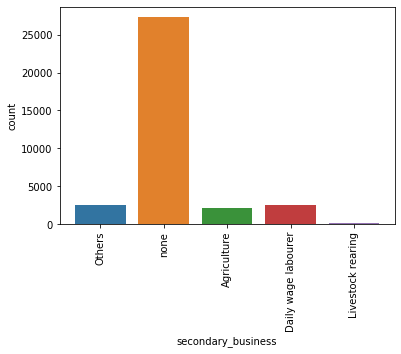

In [185]:
# plt.figure(figsize=(10,8))
sns.countplot('secondary_business',data = df)
print(len(df.secondary_business.unique()))
plt.xticks(rotation=90)
plt.plot()

**Note: Others and none parametrs of secondary_business feature leads to 86.1%. which may not give much insight.**

In [186]:
print(df.secondary_business.nunique())
print(df.secondary_business.unique())

5
['Others' 'none' 'Agriculture' 'Daily wage labourer' 'Livestock rearing'
 nan]


In [187]:
df.secondary_business.isnull().sum()

5229

In [188]:
df.secondary_business.value_counts().values.sum()

34644

In [189]:
df.secondary_business.value_counts()

none                   27268
Others                  2559
Daily wage labourer     2540
Agriculture             2100
Livestock rearing        177
Name: secondary_business, dtype: int64

In [190]:
df['secondary_business'].fillna('none', inplace=True)

#####################################################################

In [191]:
# df.secondary_business ==   ['Others', 'none', 'nan']
total_miss_sec_busins = len(df[df.secondary_business == 'Others']) + len(df[df.secondary_business == 'none']) + len(df[df.secondary_business == 'nan']) + df.secondary_business.isnull().sum()

perntage_total_miss_sec_busins = round((total_miss_sec_busins/df.shape[0])*100, 2)
perntage_total_miss_sec_busins

87.92

**Note: Seconay business features have lot of missing data along with 'none' and 'other' entries which altogether makes up approx. 87.93%.** 
Ask the client to send the updated records for this secondary_business feature as most of the data are not making value addition.
**It is worth to drop this column but before dropping this feature it is worth to discuss with stakeholder/customer approval how important this feature if dropped in the modeling.**

#####################################################################

In [192]:
df.secondary_business.isnull().sum()

0

In [193]:
# df['secondary_business'].value_counts().sort_values(ascending=False).head(20)
df['secondary_business'].value_counts()

none                   32497
Others                  2559
Daily wage labourer     2540
Agriculture             2100
Livestock rearing        177
Name: secondary_business, dtype: int64

In [194]:
df.shape

(39873, 497)

In [195]:
df.secondary_business.nunique()

5

In [196]:
#####*****************OHE for secondary_business feature*********************************#####

In [197]:
df_secondry_busines = pd.get_dummies(df.secondary_business, prefix='secondary_business', drop_first=True)

In [198]:
df = pd.concat([df, df_secondry_busines], axis=1)

In [199]:
df = df.drop(columns=['secondary_business'], axis=1)

In [200]:
#####**************************************************#####

In [201]:
df.shape

(39873, 500)

In [202]:
df.head(2)

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,...,primary_business_sari&cloth,primary_business_stationery and xerox machine,primary_business_stiched the gunnybag,primary_business_tamarind business,primary_business_thimber work,primary_business_welding work,secondary_business_Daily wage labourer,secondary_business_Livestock rearing,secondary_business_Others,secondary_business_none
0,1,22,36000.0,5000.0,0,2,1.0,R,4,70.0,...,0,0,0,0,0,0,0,0,1,0
1,2,21,94000.0,3600.0,1,1,1.0,T1,4,80.0,...,0,0,0,0,0,0,0,0,0,1


# 1.08: annual_income feature evaluation

In [203]:
# # df_sorted = df.sort_values( by =['loan_amount', 'annual_income'], ascending = [True, False])
# df_sorted_loan_incom = df.sort_values( by =['loan_amount', 'annual_income'], ascending = [True, True])
# df_sorted_loan_incom.head(5)

In [204]:
# df.annual_income
# df.annual_income.min() # 0.0
# df.annual_income.max() # 1200000.0
# df.annual_income.mean() # 43328.572001963556
df.annual_income.isnull().sum() # 0

0

**Regression models need FEATURE SCALING due to high spread in data range**

In [205]:
df.annual_income.dtypes

dtype('float64')

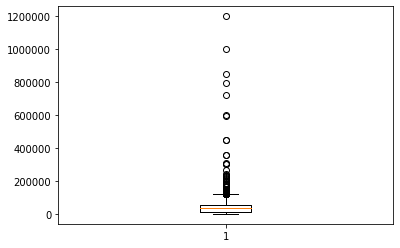

In [206]:
plt.boxplot(df.annual_income)
plt.show()

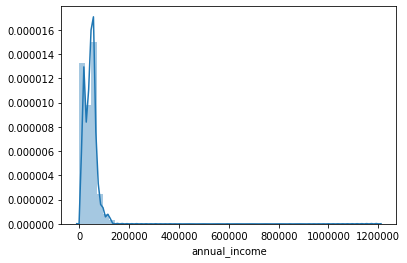

In [207]:
sns.distplot(df.annual_income)

In [208]:
# Detecting outlier in annual_income
print(df.annual_income.min())
print(df.annual_income.max())
print(df.annual_income.median())
print(df.annual_income.quantile(0.25))
print(df.annual_income.quantile(0.75))
IQR = df.annual_income.quantile(0.75) - df.annual_income.quantile(0.25)
print(IQR)

UQR = df.annual_income.quantile(0.75) + 1.5 * IQR
LQR = df.annual_income.quantile(0.25) - 1.5 * IQR
print(LQR)
print(UQR)

0.0
1200000.0
36000.0
14400.0
56000.0
41600.0
-48000.0
118400.0


In [209]:
# df[(df.annual_income <= -48000.0) | (df.annual_income >= 118400.0)].index
# df.drop(index=df[(df.annual_income <= -48000.0) | (df.annual_income >= 118400.0)].index, inplace=True)
df.drop(index=df[(df.annual_income <= -48000.0) | (df.annual_income >= 114000.0)].index, inplace=True)

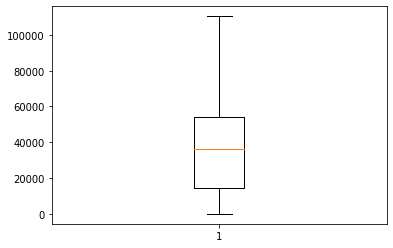

In [210]:
plt.boxplot(df.annual_income)
plt.show()

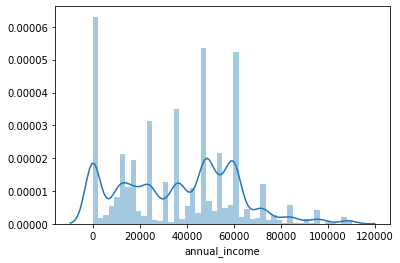

In [211]:
sns.distplot(df.annual_income)

In [212]:
df.shape

(39481, 500)

# 1.09: monthly_expenses feature evaluation

In [213]:
# df.monthly_expenses
# df.monthly_expenses.min() # 2.0
# df.monthly_expenses.max() # 240000.0
# df.monthly_expenses.mean() # 3866.72
# df.monthly_expenses.isnull().sum() # 0

In [214]:
df.monthly_expenses.isnull().sum() #120 records missing

120

In [215]:
df.monthly_expenses.value_counts().values.sum()

39361

In [216]:
# df.monthly_expenses.fillna(np.mean(df['monthly_expenses']), inplace=True)
df['monthly_expenses'].fillna(df['monthly_expenses'].mean(),inplace=True)

In [217]:
df.monthly_expenses.value_counts().values.sum()

39481

In [218]:
df.monthly_expenses.dtypes

dtype('float64')

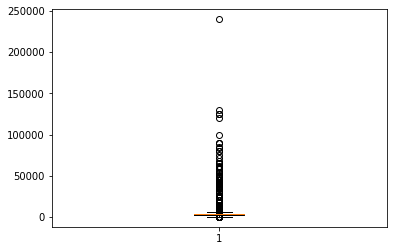

In [219]:
plt.boxplot(df.monthly_expenses)
plt.show()

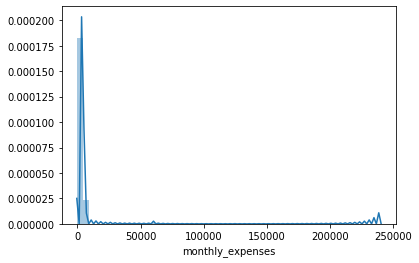

In [220]:
sns.distplot(df.monthly_expenses)

In [221]:
# Detecting outlier in monthly_expenses
print(df.monthly_expenses.min())
print(df.monthly_expenses.max())
print(df.monthly_expenses.median())
print(df.monthly_expenses.quantile(0.25))
print(df.monthly_expenses.quantile(0.75))
IQR = df.monthly_expenses.quantile(0.75) - df.monthly_expenses.quantile(0.25)
print(IQR)

UQR = df.monthly_expenses.quantile(0.75) + 1.5 * IQR
LQR = df.monthly_expenses.quantile(0.25) - 1.5 * IQR
print(LQR)
print(UQR)

2.0
240000.0
3500.0
2500.0
4000.0
1500.0
250.0
6250.0


In [222]:
# df[(df.monthly_expenses <= 250.0) | (df.monthly_expenses >= 6250.0)].index
df.drop(index=df[(df.monthly_expenses <= 250.0) | (df.monthly_expenses >= 6250.0)].index, inplace=True)

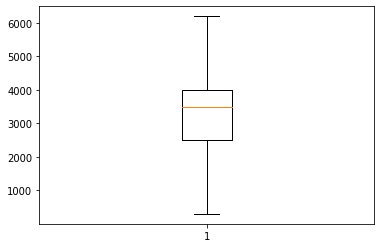

In [223]:
plt.boxplot(df.monthly_expenses)
plt.show()

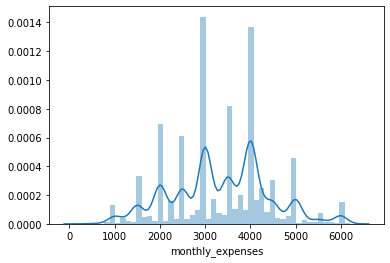

In [224]:
sns.distplot(df.monthly_expenses)

In [225]:
df.shape

(38284, 500)

# 1.10: old_dependents feature evaluation

In [226]:
# df.old_dependents
# df.old_dependents.min() # 0
# df.old_dependents.max() # 3
# df.old_dependents.mean() # 0.05
# df.old_dependents.isnull().sum() # 0
# df.old_dependents.nunique() # 4

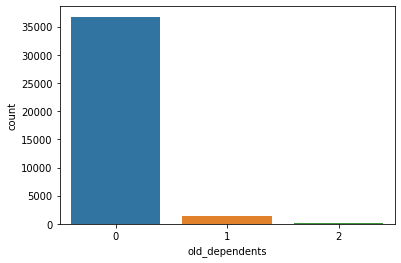

In [227]:
sns.countplot(df.old_dependents)

In [228]:
print(df.old_dependents.nunique())
print(df.old_dependents.sort_values().unique())

3
[0 1 2]


In [229]:
df.old_dependents.value_counts()

0    36749
1     1423
2      112
Name: old_dependents, dtype: int64

In [230]:
# df[df.old_dependents >= 3]
df.drop(index=df[df.old_dependents >= 3].index, inplace=True)

In [231]:
df.old_dependents.value_counts()

0    36749
1     1423
2      112
Name: old_dependents, dtype: int64

# 1.11: young_dependents feature evaluation

In [232]:
# df.young_dependents
# df.young_dependents.min() # 0
# df.young_dependents.max() # 7
# df.young_dependents.mean() # 1.31
# df.young_dependents.isnull().sum() # 0
# df.young_dependents.nunique() # 8

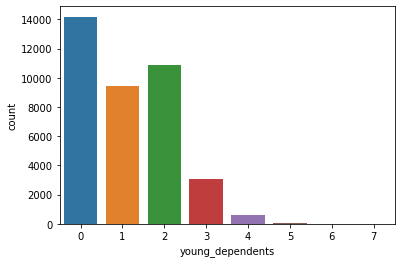

In [233]:
sns.countplot(df.young_dependents)

In [234]:
print(df.young_dependents.nunique())
print(df.young_dependents.sort_values().unique())

8
[0 1 2 3 4 5 6 7]


In [235]:
df.young_dependents.value_counts()

0    14184
2    10865
1     9474
3     3063
4      595
5       81
6       18
7        4
Name: young_dependents, dtype: int64

In [236]:
df[df.young_dependents > 5]
df.drop(index=df[df.young_dependents > 5].index, inplace=True)

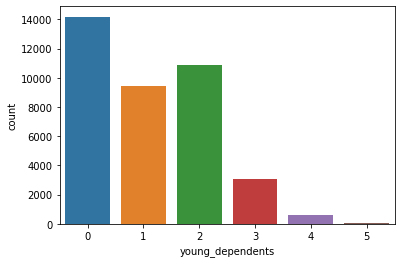

In [237]:
sns.countplot(df.young_dependents)

In [238]:
df.young_dependents.value_counts()

0    14184
2    10865
1     9474
3     3063
4      595
5       81
Name: young_dependents, dtype: int64

# 1.12: home_ownership Feature Imputation

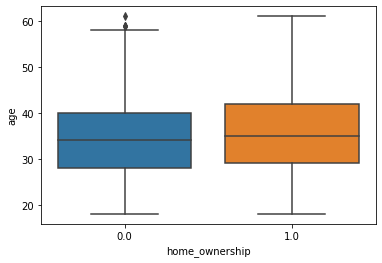

In [239]:
sns.boxplot(x = 'home_ownership', y='age', data = df)
# sns.boxplot(x = 'home_ownership', y='loan_amount', data = df)

[]

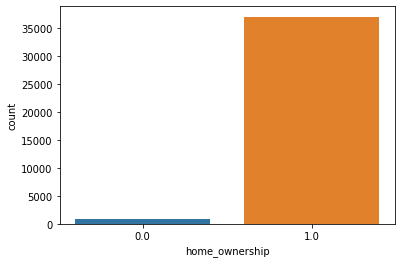

In [240]:
sns.countplot(df.home_ownership)
plt.plot()

In [241]:
print(df.home_ownership.nunique())
print(df.home_ownership.unique())

2
[ 1.  0. nan]


In [242]:
df.home_ownership.value_counts()

1.0    37008
0.0      899
Name: home_ownership, dtype: int64

In [243]:
df.home_ownership.isnull().sum() 

355

In [244]:
# df['home_ownership'].unique()
# # df['home_ownership'] = df['home_ownership'].replace(np.nan, 'unknown')
# df['home_ownership'] = df['home_ownership'].replace(np.nan, 1.0)

In [245]:
df['home_ownership'].fillna(1,inplace=True)

In [246]:
df.home_ownership.value_counts()

1.0    37363
0.0      899
Name: home_ownership, dtype: int64

In [247]:
df.shape

(38262, 500)

# 1.13: type_of_house Feature Imputation

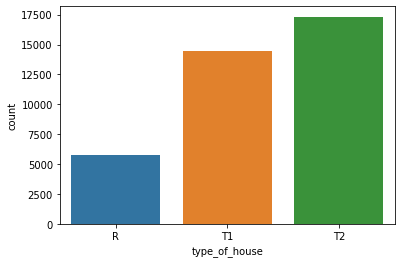

In [248]:
sns.countplot(df['type_of_house'])
plt.show()

In [249]:
df.type_of_house.mode()

0    T2
dtype: object

In [250]:
print(df.type_of_house.nunique())
print(df.type_of_house.unique())

3
['R' 'T1' 'T2' nan]


In [251]:
df.type_of_house.value_counts()

T2    17320
T1    14472
R      5790
Name: type_of_house, dtype: int64

In [252]:
df.type_of_house.isnull().sum()

680

In [253]:
df.shape

(38262, 500)

In [254]:
df.dropna(subset=['type_of_house'], inplace=True)

In [255]:
df.shape

(37582, 500)

In [256]:
df.type_of_house.value_counts()

T2    17320
T1    14472
R      5790
Name: type_of_house, dtype: int64

In [257]:
#####*****************OHE for type_of_house feature*********************************#####

In [258]:
# pd.get_dummies(df.type_of_house, prefix='type_of_house', drop_first=True).head()
df_type_of_house_new = pd.get_dummies(df.type_of_house, prefix='type_of_house', drop_first=True)

In [259]:
# df_type_of_house_new
df_type_of_house_new.head()

,type_of_house_T1,type_of_house_T2
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0


In [260]:
df = pd.concat([df, df_type_of_house_new], axis=1)

In [261]:
df = df.drop(columns=['type_of_house'], axis=1)

In [262]:
#####**************************************************#####

In [263]:
df.head()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,...,primary_business_stiched the gunnybag,primary_business_tamarind business,primary_business_thimber work,primary_business_welding work,secondary_business_Daily wage labourer,secondary_business_Livestock rearing,secondary_business_Others,secondary_business_none,type_of_house_T1,type_of_house_T2
0,1,22,36000.0,5000.0,0,2,1.0,4,70.0,1.0,...,0,0,0,0,0,0,1,0,0,0
1,2,21,94000.0,3600.0,1,1,1.0,4,80.0,1.0,...,0,0,0,0,0,0,0,1,1,0
2,3,24,48000.0,4000.0,0,2,1.0,4,50.0,1.0,...,0,0,0,0,0,0,1,0,1,0
3,4,26,7000.0,5000.0,0,2,1.0,5,50.0,1.0,...,0,0,0,0,0,0,0,1,1,0
4,5,23,36000.0,3500.0,0,0,1.0,1,112.0,1.0,...,0,0,0,0,0,0,0,0,1,0


In [264]:
df.shape

(37582, 501)

In [265]:
# df.type_of_house.value_counts()

# df['type_of_house'] = df['type_of_house'].map({"T1":1,"T2":2,"R":3})
# df['type_of_house'].fillna(2,inplace=True)

In [266]:
# print(df.isnull().sum())

# 1.14: occupants_count feature evaluation

In [267]:
# df.occupants_count
# df.occupants_count.min() # 0
# df.occupants_count.max() # 950000
# df.occupants_count.mean() # 30.761312119199562
# df.occupants_count.isnull().sum() # 0
# df.occupants_count.nunique() # 23
df.occupants_count.sort_values().unique() # 23

array([     0,      1,      2,      3,      4,      5,      6,      7,
            8,      9,     10,     11,     12,    100,    250,    300,
          400,    450,    600,    700,    900, 950000], dtype=int64)

**There are unrealist occupant_count which needs imputation**

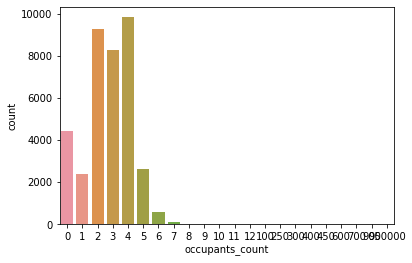

In [268]:
sns.countplot(df.occupants_count)

In [269]:
df.occupants_count.value_counts()

4         9824
2         9252
3         8251
0         4413
5         2649
1         2404
6          578
7          118
8           39
10          25
9           12
600          5
12           2
300          2
700          1
11           1
900          1
100          1
400          1
450          1
250          1
950000       1
Name: occupants_count, dtype: int64

In [270]:
df.shape

(37582, 501)

In [271]:
# df[df.occupants_count >= 15].index
# df[df.occupants_count > 8].index
df.drop(index=df[df.occupants_count >= 8].index, inplace=True)

In [272]:
df.shape

(37489, 501)

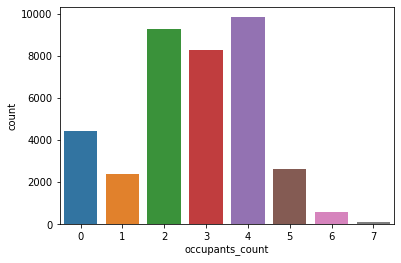

In [273]:
sns.countplot(df.occupants_count)

In [274]:
df.occupants_count.value_counts()

4    9824
2    9252
3    8251
0    4413
5    2649
1    2404
6     578
7     118
Name: occupants_count, dtype: int64

In [275]:
df.shape

(37489, 501)

# 1.15: house_area feature evaluation

In [276]:
# df.house_area
# df.house_area.min() # 0.0
# df.house_area.max() # 700000.0
# df.house_area.mean() # 621.3039596498347
# df.house_area.isnull().sum() # 0

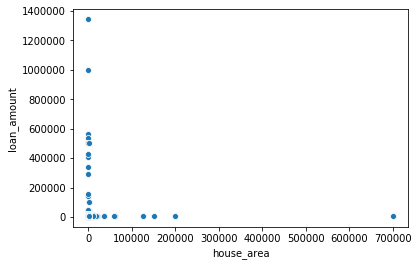

In [277]:
sns.scatterplot(df.house_area, df.loan_amount)

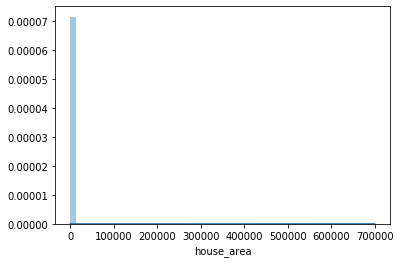

In [278]:
sns.distplot(df.house_area)

In [279]:
# sns.countplot(df.house_area)
# plt.show()

In [280]:
# plt.boxplot(df.house_area)

In [281]:
# Detecting outlier in house_area
print(df.house_area.min())
print(df.house_area.max())
print(df.house_area.median())
print(df.house_area.quantile(0.25))
print(df.house_area.quantile(0.75))
IQR = df.house_area.quantile(0.75) - df.house_area.quantile(0.25)
print(IQR)

UQR = df.house_area.quantile(0.75) + 1.5 * IQR
LQR = df.house_area.quantile(0.25) - 1.5 * IQR
print(LQR)
print(UQR)

0.0
700000.0
400.0
200.0
620.0
420.0
-430.0
1250.0


In [282]:
df[(df.house_area <= -300) | (df.house_area >= 1300)].index

Int64Index([  137,   145,   147,   150,   169,   170,   196,   348,   647,
              653,
            ...
            39759, 39760, 39761, 39762, 39788, 39844, 39850, 39856, 39892,
            39918],
           dtype='int64', length=2804)

In [283]:
# df.drop(index=df[(df.house_area <= -300) | (df.house_area >= 1300)].index, inplace=True)
df.drop(index=df[(df.house_area <= -300) | (df.house_area >= 1100)].index, inplace=True)

[]

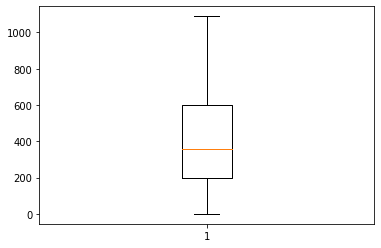

In [284]:
plt.boxplot(df.house_area)
plt.plot()

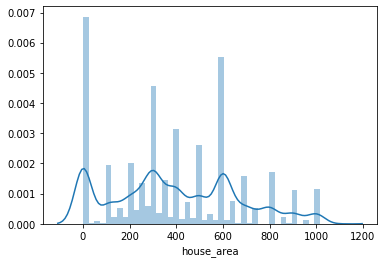

In [285]:
sns.distplot(df.house_area)

In [286]:
df.shape

(34268, 501)

# 1.16: sanitary_availability Feature Imputation

In [287]:
df.sanitary_availability.isnull().sum()

52

In [288]:
print(df.sanitary_availability.nunique())
print(df.sanitary_availability.unique())

2
[ 1.  0. nan]


In [289]:
df.sanitary_availability.value_counts()

1.0    23103
0.0    11113
Name: sanitary_availability, dtype: int64

In [290]:
df.shape

(34268, 501)

In [291]:
# df[df.sanitary_availability == -1.]

In [292]:
# df.drop(index=[28817], inplace=True)

In [293]:
df.shape

(34268, 501)

In [294]:
df.sanitary_availability.isnull().sum() 

52

In [295]:
df.dropna(subset=['sanitary_availability'], inplace=True)

In [296]:
df.shape

(34216, 501)

In [297]:
df.sanitary_availability.isnull().sum()

0

In [298]:
df.sanitary_availability.value_counts()

1.0    23103
0.0    11113
Name: sanitary_availability, dtype: int64

In [299]:
# df.sanitary_availability.mean()

In [300]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values='NaN', strategy='most_frequent')
# imputer = SimpleImputer(missing_values='NaN', strategy='constant', fill_value='missing')
# imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
# Can only use these strategies: ['mean', 'median', 'most_frequent', 'constant']

# imputer.fit_transform(df[:,['sanitary_availability']])

In [301]:
# df['sanitary_availability'].fillna(df['sanitary_availability'].mean(),inplace=True)

In [302]:
# df.sanitary_availability.value_counts()

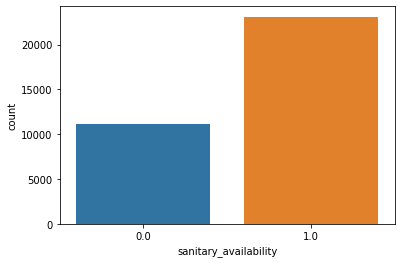

In [303]:
sns.countplot(df.sanitary_availability)
plt.show()

# 1.17: water_availabity Feature Imputation

In [304]:
print(df.water_availabity.nunique())
print(df.water_availabity.unique())

3
[0.5 nan 1.  0. ]


In [305]:
df.water_availabity.value_counts()

1.0    15434
0.5    14303
0.0      139
Name: water_availabity, dtype: int64

In [306]:
df.water_availabity.isnull().sum() 

4340

In [307]:
df.shape

(34216, 501)

In [308]:
df.dropna(subset=['water_availabity'], inplace=True)

In [309]:
df.shape

(29876, 501)

In [310]:
print(df.water_availabity.unique())

[0.5 1.  0. ]


In [311]:
df.water_availabity.replace(0.5, 0.0, inplace=True)

In [312]:
df.water_availabity.value_counts()

1.0    15434
0.0    14442
Name: water_availabity, dtype: int64

In [313]:
df.shape

(29876, 501)

In [314]:
# df.water_availabity.mean()

In [315]:
# df['water_availabity'].fillna(df['water_availabity'].mean(),inplace=True)

In [316]:
# df.water_availabity.value_counts()

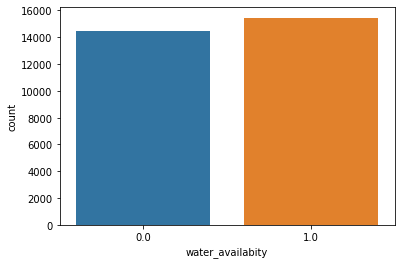

In [317]:
sns.countplot(df.water_availabity)
plt.show()

In [318]:
df.shape

(29876, 501)

# 1.18: loan_purpose Feature Imputation

In [319]:
df.columns

Index(['Id', 'age', 'annual_income', 'monthly_expenses', 'old_dependents',
       'young_dependents', 'home_ownership', 'occupants_count', 'house_area',
       'sanitary_availability',
       ...
       'primary_business_stiched the gunnybag',
       'primary_business_tamarind business', 'primary_business_thimber work',
       'primary_business_welding work',
       'secondary_business_Daily wage labourer',
       'secondary_business_Livestock rearing', 'secondary_business_Others',
       'secondary_business_none', 'type_of_house_T1', 'type_of_house_T2'],
      dtype='object', length=501)

In [320]:
for each in df.loan_purpose.unique():
    print(each,"=", df[df.loan_purpose==each].shape[0]/df.shape[0])

Apparels = 0.15795287187039764
Beauty Salon = 0.005656714419601017
Retail Store = 0.042743339135091714
Eateries = 0.04796492167626188
Meat Businesses = 0.11581202302851787
Animal husbandry = 0.11892488954344624
Agro Based Businesses = 0.12126790735038158
Farming/ Agriculture = 0.08568750836792074
Retail Sale = 0.01322131476770652
Carpentery work = 0.006861695006024903
Construction Related Activities = 0.016769313161065738
Business Services - II = 0.022559914312491634
Tobacco Related Activities = 0.022928102825010042
Repair Services = 0.00555629937073236
Laundry Services = 0.004250903735439818
Food Items = 0.007464185299236845
Handicrafts = 0.10637300843486411
Business Services - I = 0.0066273932253313695
Transportation Services = 0.006225733029856741
Flower Business = 0.007497656982193065
Artifical Jewellry Selling = 0.0159994644530727
Jewellry Shop = 0.0005020752443432856
Agarbatti Business = 0.0019078859285044851
Miscellaneous = 0.0005355469272995046
Education Loan = 0.04913643057972

In [321]:
# df.groupby('loan_purpose').describe().head().T

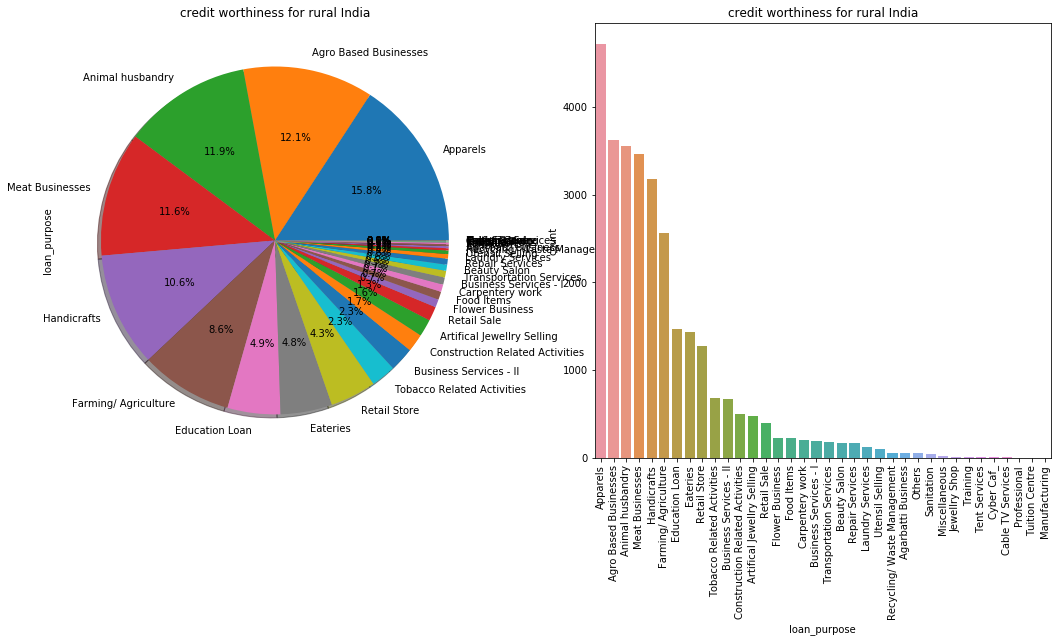

In [322]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['loan_purpose'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('credit worthiness for rural India')
#ax[0].set_ylabel('Count')
sns.countplot('loan_purpose',data=df,ax=ax[1],order=df['loan_purpose'].value_counts().index)
ax[1].set_title('credit worthiness for rural India')
plt.xticks(rotation=90)
#ax[1].set_xticklabels(rotation=30)
plt.show()

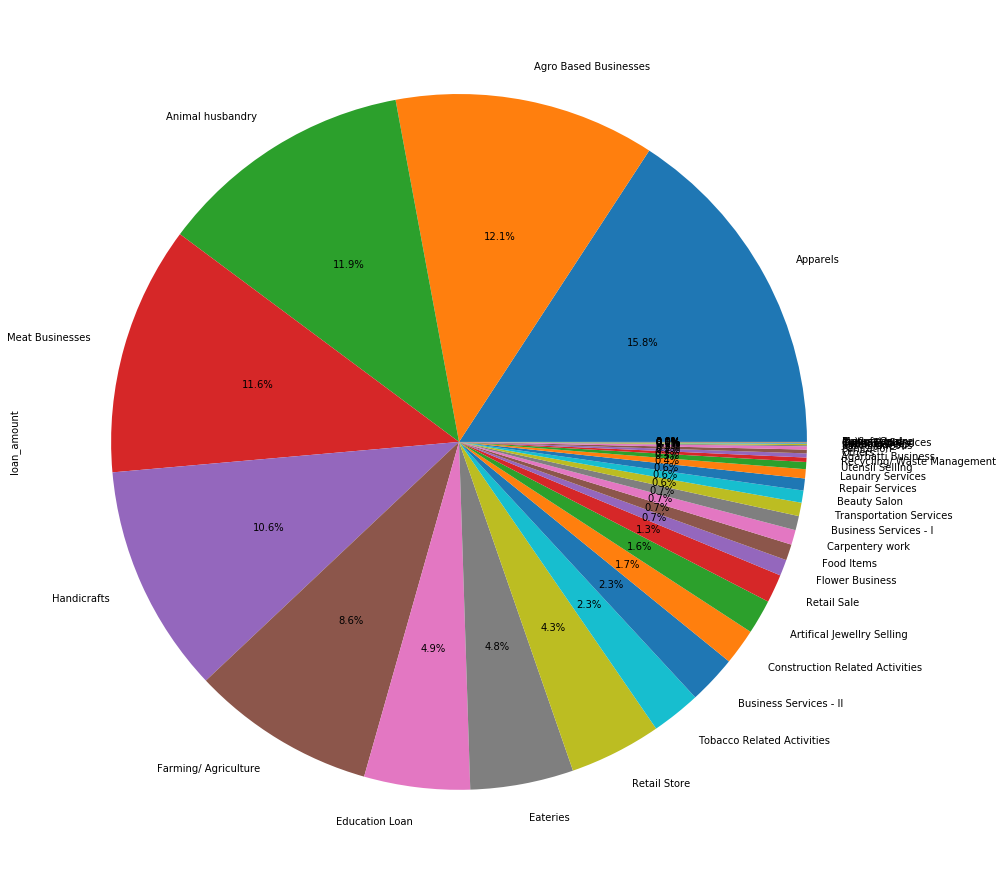

In [323]:
plt.figure(figsize=(16,16))
# df.groupby([df.loan_purpose])['loan_amount'].size()
# df.groupby([df.loan_purpose])['loan_amount'].groups
df.groupby([df.loan_purpose])['loan_amount'].count().sort_values(ascending=False).plot(kind='pie', autopct='%1.1f%%')

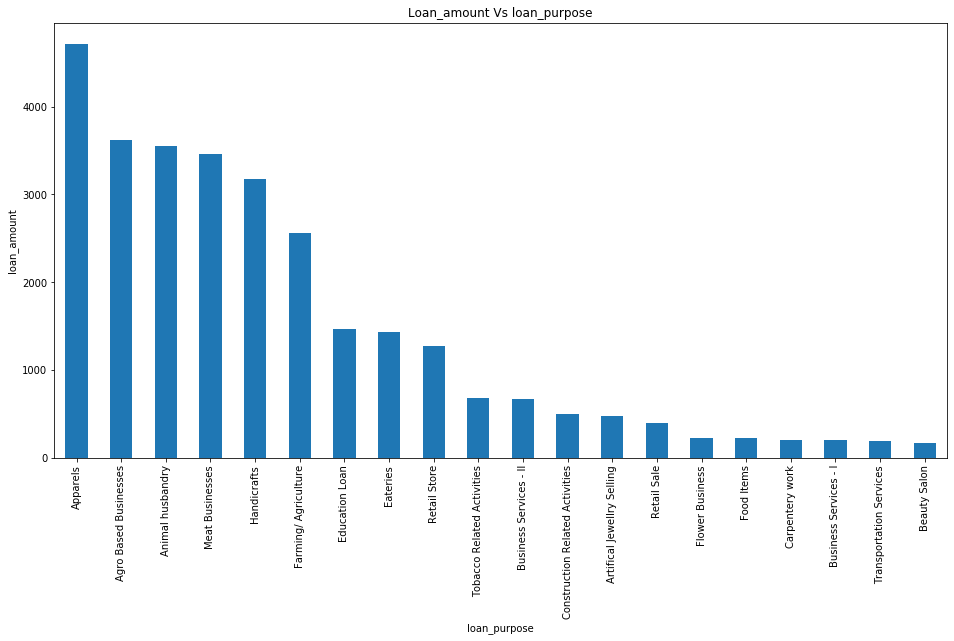

In [324]:
plt.figure(figsize=(16,8))
all_loan_purpose = df.groupby([df.loan_purpose])['loan_amount'].count()
all_loan_purpose.sort_values(ascending = False)[0:20].plot(kind='bar')
plt.title ("Loan_amount Vs loan_purpose")
plt.xlabel("loan_purpose")
plt.ylabel("loan_amount")
plt.show()

In [325]:
# ### 
# print(df[df.loan_purpose=='Apparels']['loan_installments'].unique())
# print(df[df.loan_purpose=='Apparels']['type_of_house'].unique())

In [326]:
# # Visualizing the loan_purpose in the data set
# plt.figure(figsize=(27,7))
# sns.countplot(x='loan_purpose', hue='loan_amount', data=df, palette='Set1')
# plt.show()

In [327]:
# len(df.loan_purpose.value_counts())
print(df.loan_purpose.nunique())
print(df.loan_purpose.unique())

36
['Apparels' 'Beauty Salon' 'Retail Store' 'Eateries' 'Meat Businesses'
 'Animal husbandry' 'Agro Based Businesses' 'Farming/ Agriculture'
 'Retail Sale' 'Carpentery work' 'Construction Related Activities'
 'Business Services - II' 'Tobacco Related Activities' 'Repair Services'
 'Laundry Services' 'Food Items' 'Handicrafts' 'Business Services - I'
 'Transportation Services' 'Flower Business' 'Artifical Jewellry Selling'
 'Jewellry Shop' 'Agarbatti Business' 'Miscellaneous' 'Education Loan'
 'Recycling/ Waste Management' 'Tuition Centre' 'Utensil Selling'
 'Cyber Caf_' 'Others' 'Training' 'Professional' 'Cable TV Services'
 'Tent Services' 'Sanitation' 'Manufacturing']


In [328]:
df.loan_purpose.isnull().sum()

0

In [329]:
## Some point of reason used this code but now it is ABSOLETE CODE!!!
# print(df['loan_purpose'].value_counts().values.sum()) # Missing values = 40000 - 39974 = 26 records
# print(df.shape)
# print("Missing values in loan_purpose: {}".format(40000 - 39974))

In [330]:
df.loan_purpose.value_counts()

Apparels                           4719
Agro Based Businesses              3623
Animal husbandry                   3553
Meat Businesses                    3460
Handicrafts                        3178
Farming/ Agriculture               2560
Education Loan                     1468
Eateries                           1433
Retail Store                       1277
Tobacco Related Activities          685
Business Services - II              674
Construction Related Activities     501
Artifical Jewellry Selling          478
Retail Sale                         395
Flower Business                     224
Food Items                          223
Carpentery work                     205
Business Services - I               198
Transportation Services             186
Beauty Salon                        169
Repair Services                     166
Laundry Services                    127
Utensil Selling                      99
Recycling/ Waste Management          61
Agarbatti Business                   57


In [331]:
df.shape

(29876, 501)

In [332]:
df.dropna(subset=['loan_purpose'], inplace=True)

In [333]:
df.shape

(29876, 501)

In [334]:
# df.loan_purpose.value_counts()

In [335]:
len(df.loan_purpose.value_counts())

36

In [336]:
#####*****************OHE for loan_purpose feature*********************************#####

In [337]:
df_loan_purpose = pd.get_dummies(df.loan_purpose, prefix='loan_purpose', drop_first=True)

In [338]:
# df_loan_purpose

In [339]:
df = pd.concat([df, df_loan_purpose], axis=1)

In [340]:
df = df.drop(columns=['loan_purpose'], axis=1)

In [341]:
#####**************************************************#####

In [342]:
df.shape

(29876, 535)

In [343]:
# print(df.isnull().sum())

In [344]:
# df.head()

In [345]:
# df.columns.tolist()

In [346]:
# df['loan_purpose']=df['loan_purpose'].map({"Apparels":1,"Agro Based Businesses":2,"Animal husbandry":3, "Meat Businesses":4,
# "Handicrafts":5,"Farming/ Agriculture":6,"Education Loan":7,"Retail Store":8,
# "Eateries":9,"Business Services - II":10,"Tobacco Related Activities":11,
# "Construction Related Activities":12,"Retail Sale":13,"Artifical Jewellry Selling":14,
# "Carpentery work":15,"Food Items":16,"Business Services - I":17,"Transportation Services":18,
# "Flower Business":19,"Beauty Salon":20,"Repair Services":21,"Laundry Services":22,
# "Agarbatti Business":23,"Utensil Selling":24,"Sanitation":25,"Recycling/ Waste Management":26,
# "Others":27,"Vocational Loans":28,"Jewellry Shop":29,"Training":30,"Miscellaneous":31,
# "Cyber Caf_":32,"Tent Services":33,"Cable TV Services":34,"Professional":35,
# "Tuition Centre":36,"Manufacturing":37})

In [347]:
# df['loan_purpose'].fillna(1, inplace=True) # 26 nulls are filled with max cout values

In [348]:
# df.loan_purpose.dtypes

In [349]:
# df['loan_purpose']=df['loan_purpose'].astype(int)

In [350]:
# df.loan_purpose.dtypes

In [351]:
# print(df.isnull().sum())

In [352]:
# df.info()

# 1.19: loan_tenure Feature Imputation

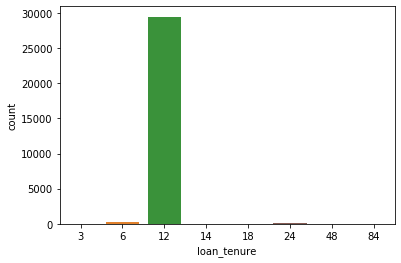

In [353]:
sns.countplot(df.loan_tenure)

In [354]:
# df.loan_tenure
# df.loan_tenure.nunique() # 8
df.loan_tenure.unique()

array([12, 24, 84,  3,  6, 18, 14, 48], dtype=int64)

In [355]:
df.loan_tenure.dtypes

dtype('int64')

In [356]:
df.loan_tenure.value_counts()

12    29447
6       313
24      106
48        3
84        2
3         2
18        2
14        1
Name: loan_tenure, dtype: int64

In [357]:
df.shape

(29876, 535)

In [358]:
# df[(df.loan_tenure == 48) | (df.loan_tenure == 84) | (df.loan_tenure == 3) | (df.loan_tenure == 18) | (df.loan_tenure == 14)].index
df.drop(index=df[(df.loan_tenure == 48) | (df.loan_tenure == 84) | (df.loan_tenure == 3) | (df.loan_tenure == 18) | (df.loan_tenure == 14)].index, inplace=True)

In [359]:
df.shape

(29866, 535)

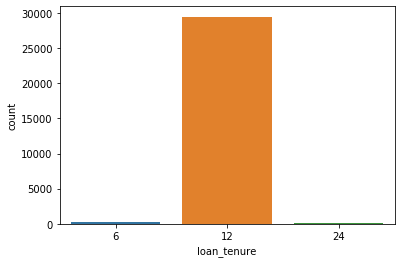

In [360]:
sns.countplot(df.loan_tenure)

In [361]:
df.loan_tenure.value_counts()

12    29447
6       313
24      106
Name: loan_tenure, dtype: int64

In [362]:
df.shape

(29866, 535)

# 1.20: loan_installments feature

In [363]:
# df.loan_installments.dtypes # dtype('int64')
# df.loan_installments.isnull().sum() # 0
# df.loan_installments.nunique() # 16
df.loan_installments.sort_values().unique()

array([ 2,  4,  6,  8, 12, 24, 50], dtype=int64)

[]

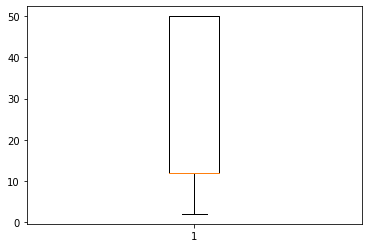

In [364]:
plt.boxplot(df.loan_installments)
plt.plot()

In [365]:
df.loan_installments.value_counts()

12    20961
50     8439
6       314
24       99
2        44
8         7
4         2
Name: loan_installments, dtype: int64

[]

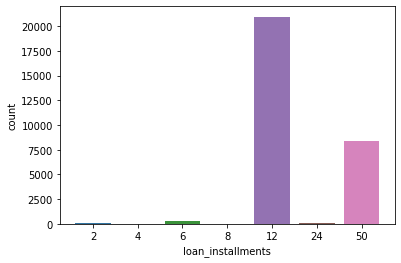

In [366]:
sns.countplot(df.loan_installments)
plt.plot()

In [367]:
df.shape

(29866, 535)

# 1.21: loan_amount feature

In [368]:
# #### A function to determine whether a integer or not in loan amount feature

# def isInt(x):
#     try:
#         int(x)
#         return True
#     except ValueError:
#         return False

# #### Get all rows which don't have integer in loan_amount column

# df[True == df['loan_amount'].map(lambda x : not isInt(x))]

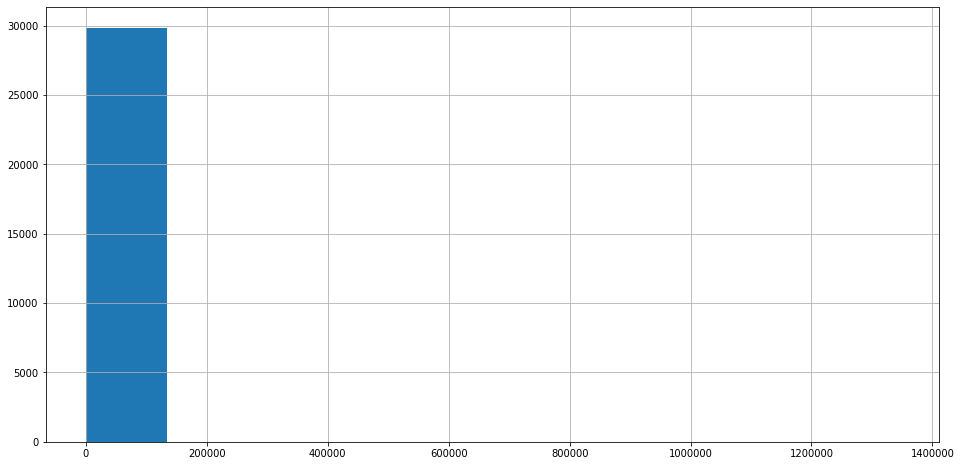

In [369]:
df.loan_amount.hist(figsize=(16,8))
plt.show()

- loan_amount feature has outlier which is evident from the histogram.

In [370]:
# df.loan_amount.unique() # target variable

In [371]:
# df.loan_amount
# df.loan_amount.nunique() # 110
# df.loan_amount.min() # 100.0
# df.loan_amount.max() # 1343000.0

[]

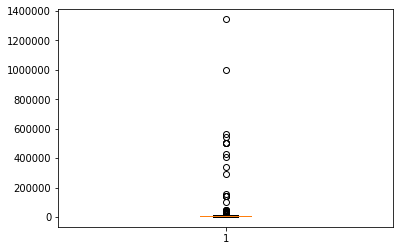

In [372]:
plt.boxplot(df.loan_amount)
plt.plot()

In [373]:
# df.loan_amount.value_counts().sort_values(ascending=False).head(20)

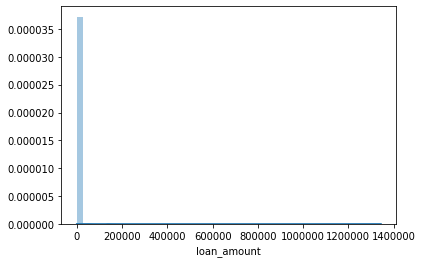

In [374]:
sns.distplot(df.loan_amount)

In [375]:
# Detecting outlier
print(df.loan_amount.min())
print(df.loan_amount.max())
print(df.loan_amount.median())
print(df.loan_amount.quantile(0.25))
print(df.loan_amount.quantile(0.75))
IQR = df.loan_amount.quantile(0.75) - df.loan_amount.quantile(0.25)
print(IQR)

UQR = df.loan_amount.quantile(0.75) + 1.5 * IQR
LQR = df.loan_amount.quantile(0.25) - 1.5 * IQR
print(LQR)
print(UQR)

500.0
1343000.0
8000.0
5000.0
10000.0
5000.0
-2500.0
17500.0


In [376]:
df[(df.loan_amount < -2500.0) | (df.loan_amount > 17500.0)].index

Int64Index([ 2341,  2343,  2799,  2836,  2860, 15295, 15536, 15537, 15538,
            15539,
            ...
            39570, 39571, 39573, 39579, 39582, 39585, 39588, 39591, 39592,
            39615],
           dtype='int64', length=101)

In [377]:
df.drop(index=df[(df.loan_amount < -2500.0) | (df.loan_amount > 17500.0)].index, inplace=True)

[]

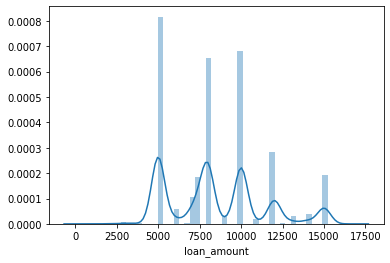

In [378]:
sns.distplot(df.loan_amount)
plt.plot()

[]

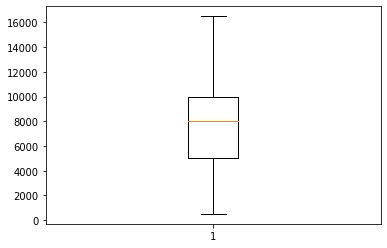

In [379]:
plt.boxplot(df.loan_amount)
plt.plot()

In [380]:
# #Checking Outlier by definition and treating outliers

# #getting median age
# loan_amount_col_df = pd.DataFrame(df['loan_amount'])
# loan_amount_median = loan_amount_col_df.median()

# #getting IQR of loan_amount column
# Q3 = loan_amount_col_df.quantile(q=0.75)
# Q1 = loan_amount_col_df.quantile(q=0.25)
# IQR = Q3-Q1

# #Deriving boundaries of Outliers
# IQR_LL = int(Q1 - 1.5*IQR)
# IQR_UL = int(Q3 + 1.5*IQR)

# #Finding and treating outliers - both lower and upper end
# df.loc[df['loan_amount']>IQR_UL , 'loan_amount'] = int(loan_amount_col_df.quantile(q=0.99))
# df.loc[df['loan_amount']<IQR_LL , 'loan_amount'] = int(loan_amount_col_df.quantile(q=0.01))

In [381]:
df.shape

(29765, 535)

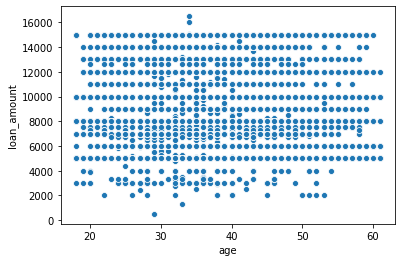

In [382]:
sns.scatterplot(x=df.age, y=df.loan_amount)
plt.show()

# Saving data set...

In [383]:
df.to_csv('Cleaned_trainingData_for_assignment.csv')

#### Dropped all columns which are converted to dummies or aren't impacting the target variable like Id...etc

# Section-2: There is a new customer who needs a loan. Which models will be best suited to predict the loan_amount that can be granted to the customer?

**The given problem is REGRESSION category, so the REGRESSION ALGORITHS model can be used to predict the loan_amount that can be granted to the new customer.** Most commen algorithms are LinearRegression, Ridge and Lasso Regression: L1 and L2 Regularization, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor. If data is in non linear passion then is prefered to use SVR, KNeighborsRegressor which are expensive from computational point of view.

- The given problem is REGRESSION category (because of continuous target feature), so the REGRESSION ALGORITHS can be used to predict the loan_amount that can be granted to the new customer.

- Most common algorithms are LinearRegression, Ridge and Lasso Regression: L1 and L2 Regularization, DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor. 

- If data is in nonlinear passion, then it is advisable to use SVR or KNeighborsRegressor which are computationally very expensive.

- It is very difficult to judge the given data without analysis whether it is in linearly separable or not. 

- Thumb rule to use very computationally expensive nonlinear algorithm like SVR or KNeighborsRegressor is that if linear algorithms not in a position to improve R2 score or reduce the cost function error (RMSE) after all the hyperparameter tuning. Even after using nonlinear algorithms if there is no improvement in results then it can be concluded that the data are not in nonlinear space. If there is an improvement in results it indicates the data supplied are in nonlinear space.


# Section-3: Build a model to predict the maximum loan_amount that can be granted to the customer. Which all variables are good predictors?

#### Independent and dependent feature creation

In [384]:
# feature_space_X = df.iloc[:, df.columns != 'loan_amount']


#### CONSIDERING MOST RELEVENT FEATURES wrt ML PRACTICAL IMPLIMENTION POINT OF VIEW
# X = df[['age', 'sex_M', 'annual_income', 'monthly_expenses', 'old_dependents', 
#      'young_dependents', 'home_ownership', 'type_of_house_T1', 'type_of_house_T2', 'occupants_count', 'house_area', 
#      'sanitary_availability', 'water_availabity', 'loan_tenure', 'loan_installments']]



# #### CONSIDERING MOST RELEVENT FEATURES wrt ML PRACTICAL IMPLIMENTION POINT OF VIEW (also considered LOAN PURPOSE)
# X = df[['age', 'sex_M', 'annual_income', 'monthly_expenses', 'old_dependents', 
#      'young_dependents', 'home_ownership', 'type_of_house_T1', 'type_of_house_T2', 'occupants_count', 'house_area', 
#      'sanitary_availability', 'water_availabity', 'loan_tenure', 'loan_installments', 'loan_purpose_Agro Based Businesses', 
#      'loan_purpose_Animal husbandry', 'loan_purpose_Apparels','loan_purpose_Artifical Jewellry Selling', 
#      'loan_purpose_Beauty Salon', 'loan_purpose_Business Services - I', 'loan_purpose_Business Services - II', 
#      'loan_purpose_Cable TV Services', 'loan_purpose_Carpentery work', 'loan_purpose_Construction Related Activities', 
#      'loan_purpose_Cyber Caf_', 'loan_purpose_Eateries', 'loan_purpose_Education Loan', 
#      'loan_purpose_Farming/ Agriculture', 'loan_purpose_Flower Business', 'loan_purpose_Food Items', 
#      'loan_purpose_Handicrafts', 'loan_purpose_Jewellry Shop', 'loan_purpose_Laundry Services',
#      'loan_purpose_Manufacturing', 'loan_purpose_Meat Businesses', 'loan_purpose_Miscellaneous', 'loan_purpose_Others',
#      'loan_purpose_Professional', 'loan_purpose_Recycling/ Waste Management', 'loan_purpose_Repair Services',
#      'loan_purpose_Retail Sale', 'loan_purpose_Retail Store', 'loan_purpose_Sanitation', 'loan_purpose_Tent Services',
#      'loan_purpose_Tobacco Related Activities', 'loan_purpose_Training', 'loan_purpose_Transportation Services',
#      'loan_purpose_Tuition Centre', 'loan_purpose_Utensil Selling']]


# X = df.drop(['city', 'social_class','Id','loan_amount'], axis=1)

# X = df.drop(['social_class','Id','loan_amount'], axis=1)

##Model used all the INDEPENDENT/PREDICTOR features to predict the TARGET/DEPENDENT feature
X = df.drop(['Id','loan_amount'], axis=1)

**NOTE:** 
- After using **all the features in the model,** it is **observed that the model complexity increases multifold as well as computationally expensive.**
- Due to the consideration of all features, now model needs **feature reduction techniques** like **Principal Component Analysis (PCA)** etc.
- As observed in the above study, there were not much considerable correlation between predictor feature, so if business orders to consider all the predictoe features then it needs hyperparameter tuning using gridsearch CV or random search CV to improve the model performance(RMSE, R2 score and accuracy).
- Initially here below we will start building/training the model by considering most important predictor feature against target feature (loan_amount) for prediction. 

In [385]:
# ### CONSIDERING MOST RELEVENT FEATURES 
# dataset_X = dataset_X[['age', 'sex_M', 'annual_income', 'monthly_expenses', 'old_dependents', 
#      'young_dependents', 'home_ownership', 'type_of_house_T1', 'type_of_house_T2', 'occupants_count', 'house_area', 
#      'sanitary_availability', 'water_availabity', 'loan_tenure', 'loan_installments']]

In [386]:
# ### CONSIDERING MOST RELEVENT FEATURES wrt ML PRACTICAL IMPLIMENTION POINT OF VIEW
# # predictor
# X = df[['age', 'sex_M', 'annual_income', 'monthly_expenses', 'old_dependents', 
#      'young_dependents', 'home_ownership', 'type_of_house_T1', 'type_of_house_T2', 'occupants_count', 'house_area', 
#      'sanitary_availability', 'water_availabity', 'loan_tenure', 'loan_installments']]


In [387]:
# ### Wihout increased predictor number feature engineering model 
# # predictor
# X = df[['age', 'annual_income', 'monthly_expenses', 'house_area', 'sanitary_availability', 'water_availabity', 
#         'loan_tenure', 'loan_installments']]

In [388]:
# ## Wihout increased predictor number feature engineering model 
# #predictor
# X = df[['annual_income', 'house_area', 'loan_tenure', 'loan_installments']]

In [389]:
# # Is loan_purpose a significant predictor

## Without loan_purpose_predictor
# X = df[['age','annual_income', 'monthly_expenses', 'house_area']]

## With loan_purpose_predictor
# X = df[['age','annual_income', 'monthly_expenses', 'house_area', 'loan_purpose_Agro Based Businesses',
#  'loan_purpose_Animal husbandry', 'loan_purpose_Apparels', 'loan_purpose_Artifical Jewellry Selling', 'loan_purpose_Beauty Salon',
#  'loan_purpose_Business Services - I', 'loan_purpose_Business Services - II', 'loan_purpose_Cable TV Services', 'loan_purpose_Carpentery work',
#  'loan_purpose_Construction Related Activities', 'loan_purpose_Cyber Caf_', 'loan_purpose_Eateries', 'loan_purpose_Education Loan', 'loan_purpose_Farming/ Agriculture',
#  'loan_purpose_Flower Business', 'loan_purpose_Food Items', 'loan_purpose_Handicrafts', 'loan_purpose_Jewellry Shop', 'loan_purpose_Laundry Services',
#  'loan_purpose_Manufacturing', 'loan_purpose_Meat Businesses', 'loan_purpose_Miscellaneous', 'loan_purpose_Others', 'loan_purpose_Professional',
#  'loan_purpose_Recycling/ Waste Management', 'loan_purpose_Repair Services', 'loan_purpose_Retail Sale', 'loan_purpose_Retail Store', 'loan_purpose_Sanitation',
#  'loan_purpose_Tent Services', 'loan_purpose_Tobacco Related Activities', 'loan_purpose_Training', 'loan_purpose_Transportation Services', 'loan_purpose_Tuition Centre',
#  'loan_purpose_Utensil Selling']]

In [390]:
# df.columns.tolist()

In [391]:
X.head()

,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,...,loan_purpose_Repair Services,loan_purpose_Retail Sale,loan_purpose_Retail Store,loan_purpose_Sanitation,loan_purpose_Tent Services,loan_purpose_Tobacco Related Activities,loan_purpose_Training,loan_purpose_Transportation Services,loan_purpose_Tuition Centre,loan_purpose_Utensil Selling
0,22,36000.0,5000.0,0,2,1.0,4,70.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,21,94000.0,3600.0,1,1,1.0,4,80.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,24,48000.0,4000.0,0,2,1.0,4,50.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,26,7000.0,5000.0,0,2,1.0,5,50.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,23,36000.0,3500.0,0,0,1.0,1,112.0,1.0,0.0,...,0,0,1,0,0,0,0,0,0,0


In [392]:
df.shape

(29765, 535)

In [393]:
# feature_class = df.iloc[:, df.columns == 'loan_amount']
# target
# y = df.pop("loan_amount")
y = df['loan_amount']

In [394]:
y

0        5000.0
1        7500.0
2        5000.0
3        7500.0
4        5000.0
          ...  
39995    8000.0
39996    8000.0
39997    8000.0
39998    8000.0
39999    8000.0
Name: loan_amount, Length: 29765, dtype: float64

In [395]:
X=X.iloc[:, :].values

In [396]:
X

array([[2.2e+01, 3.6e+04, 5.0e+03, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [2.1e+01, 9.4e+04, 3.6e+03, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [2.4e+01, 4.8e+04, 4.0e+03, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       ...,
       [3.5e+01, 4.8e+04, 3.5e+03, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [2.8e+01, 4.8e+04, 4.0e+03, ..., 0.0e+00, 0.0e+00, 0.0e+00],
       [3.2e+01, 7.2e+04, 4.5e+03, ..., 0.0e+00, 0.0e+00, 0.0e+00]])

In [397]:
y = y.iloc[:].values

In [398]:
y

array([5000., 7500., 5000., ..., 8000., 8000., 8000.])

# Split data into a train-test dataset

In [399]:
# training_set, test_set, class_set, test_class_set = train_test_split(feature_space,feature_class,test_size = 0.20,random_state = 42)

In [400]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [401]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23812, 533) (5953, 533) (23812,) (5953,)


In [402]:
# # Cleaning test sets to avoid future warning messages
# class_set = class_set.values.ravel() 
# test_class_set = test_class_set.values.ravel() 

In [403]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Feature scaling

In [404]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Data prediction starts...

# GradientBoostingRegressor

In [405]:
# np.random.seed(42)
# start = time.time()

# param = {'n_estimators': 500,
#           'max_depth': 4,
#           'min_samples_split': 5,
#           'learning_rate': 0.01,
#           'loss': 'ls'}

# lgb_reg = GradientBoostingRegressor(**param)
# lgb_reg.fit(X_train, y_train)
# print(rmse(lgb_reg.predict(X_test), y_test))

# end = time.time()
# print('Time taken in grid search: {0: .2f}'.format(end - start))

In [406]:
param = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [407]:
lgb_reg = GradientBoostingRegressor(**param)
lgb_reg.fit(X_train, y_train)
print(rmse(lgb_reg.predict(X_test), y_test))

2137.8169770149607


In [408]:
#Checking accuracy on training data
accuracy = lgb_reg.score(X_train,y_train)
print(accuracy*100,'%')

47.81236074297883 %


In [409]:
#Checking accuracy on test data
accuracy = lgb_reg.score(X_test,y_test)
print(accuracy*100,'%')

45.67636824904835 %


In [410]:
r2_score(lgb_reg.predict(X_test), y_test)

-0.6827586756985791

In [411]:
#Feature importent 'purpose_loan'

<Figure size 1440x864 with 0 Axes>

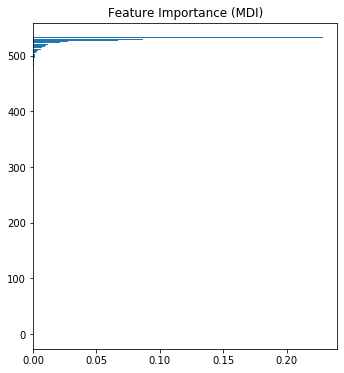

In [412]:
plt.figure(figsize=(20,12))
feature_importance = lgb_reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, np.array(temp[cols_to_use])[sorted_idx])
plt.title('Feature Importance (MDI)')
#fig.tight_layout()
plt.show()

# Linear Regression

In [413]:
lr_reg = LinearRegression().fit(X_train, y_train)
lr_reg

LinearRegression()

In [414]:
y_pred = lr_reg.predict(X_test)
y_pred

array([7394.87713922, 8512.87713922, 8486.87713922, ..., 8102.87713922,
       8746.87713922, 6146.87713922])

In [415]:
#Checking accuracy on training data
accuracy = lr_reg.score(X_train,y_train)
print(accuracy*100,'%')

37.18135505943445 %


In [416]:
#Checking accuracy on test data
accuracy = lr_reg.score(X_test,y_test)
print(accuracy*100,'%')

-1.5066618516091085e+28 %


**Note:** By obserwing train and test accuray, the model needs **Review!!!!!**. As it is just a trail run with all predictors. Hoping later iterations it may get improved results!!!!.

In [417]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred, y_test)

1.2675585785264401e+33

In [418]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
rmse

3.5602788915005524e+16

In [419]:
r2_score(y_pred, y_test)

-1.7996992442537163e-05

In [420]:
# X_test #the test data - predictors
# y_test #the actual values in test data - target column
# y_pred
# lr_reg.predict(X_test) #predcited values on test data
# lr_reg.intercept_ #checking the intercept of model equation
# lr_reg.coef_ #Checking the coefficients of model equation

In [421]:
# # Calculate the residuals

# #Importing library to check 'Mean Absolute Error(MAE)', 'Mean Squared Error(MSE)' and 'Root Mean Squared Error (RMSE)'
# from sklearn import metrics 

# #Calculate the residuals/ERRORS
# print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
# print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
# print('RMSE: ', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))

In [422]:
# # mean squared error
# mse = np.sum((y_pred - y_test)**2)
# print("mse: ", mse)

# # root mean squared error
# # m is the number of training examples
# rmse = np.sqrt(mse)
# print("rmse: ",rmse)

# Random Forest Regressor

In [423]:
from sklearn.ensemble import RandomForestRegressor

In [424]:
## modelling
rf_regr = RandomForestRegressor(max_depth=4, random_state=42,n_estimators=25)
# training
rf_regr.fit(X_train, y_train)  

##### model evaluation
print('On train data: r^2 score', r2_score(y_train, rf_regr.predict(X_train)))
print('On test data: r^2 score', r2_score(y_test, rf_regr.predict(X_test)))

On train data: r^2 score 0.352503478845135
On test data: r^2 score 0.3420038942293002


In [425]:
## modelling

rf_regr = RandomForestRegressor(oob_score = True)
rf_regr.fit(X_train,y_train)  # training
##### model evaluation
print('On train data: r^2 score', r2_score(y_train, rf_regr.predict(X_train)))
print('On test data: r^2 score', r2_score(y_test, rf_regr.predict(X_test)))

On train data: r^2 score 0.9430877968995361
On test data: r^2 score 0.6153618326469397


In [426]:
scores = cross_val_score(RandomForestRegressor(), X_train, y_train, scoring = 'r2',cv = 3 )
print('standard deviation:',np.std(scores))
print('Average:',np.mean(scores))
print(scores)

standard deviation: 0.0037492189619506453
Average: 0.5999328535980365
[0.5946785  0.60194458 0.60317548]


In [427]:
# y_pred=rf_regr.predict(X_test)
# rmse(y_pred,y_test)

In [428]:
#Checking accuracy on training data
accuracy = rf_regr.score(X_train,y_train)
print(accuracy*100,'%')

94.30877968995361 %


In [429]:
#Checking accuracy on test data
accuracy = rf_regr.score(X_test,y_test)
print(accuracy*100,'%')

61.53618326469397 %


In [430]:
r2_score(y_pred, y_test)

-1.7996992442537163e-05

In [431]:
# rf_regr.feature_importances_

In [432]:
# features=df.columns
# importances = rf_regr.feature_importances_
# indices = np.argsort(importances)

# plt.figure(1)
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), features[indices])
# plt.xlabel('Relative Importance')

In [433]:
# column2 = df.columns.tolist()
# column2

In [434]:
columns2 = ['annual_income', 'house_area', 'loan_tenure', 'loan_installments']
# columns2 = [c for c in columns2 if c not in['annual_income', 'house_area', 'loan_tenure', 'loan_installments']]

In [435]:
columns2

['annual_income', 'house_area', 'loan_tenure', 'loan_installments']

In [436]:
df.columns

Index(['Id', 'age', 'annual_income', 'monthly_expenses', 'old_dependents',
       'young_dependents', 'home_ownership', 'occupants_count', 'house_area',
       'sanitary_availability',
       ...
       'loan_purpose_Repair Services', 'loan_purpose_Retail Sale',
       'loan_purpose_Retail Store', 'loan_purpose_Sanitation',
       'loan_purpose_Tent Services', 'loan_purpose_Tobacco Related Activities',
       'loan_purpose_Training', 'loan_purpose_Transportation Services',
       'loan_purpose_Tuition Centre', 'loan_purpose_Utensil Selling'],
      dtype='object', length=535)

In [437]:
# # features=df.columns[[3,4,6,8,9,10]]
# features=df.columns
# importances = rf_regr.feature_importances_
# indices = np.argsort(importances)

# plt.figure(1)
# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), features[indices])
# plt.xlabel('Relative Importance')

# Feature importent

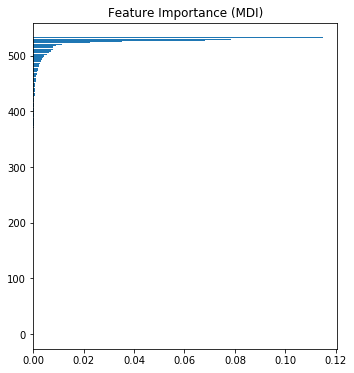

In [438]:
feature_importance = rf_regr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, np.array(temp[cols_to_use])[sorted_idx])
plt.title('Feature Importance (MDI)')
#fig.tight_layout()
plt.show()

In [443]:
df.columns

Index(['Id', 'age', 'annual_income', 'monthly_expenses', 'old_dependents',
       'young_dependents', 'home_ownership', 'occupants_count', 'house_area',
       'sanitary_availability',
       ...
       'loan_purpose_Repair Services', 'loan_purpose_Retail Sale',
       'loan_purpose_Retail Store', 'loan_purpose_Sanitation',
       'loan_purpose_Tent Services', 'loan_purpose_Tobacco Related Activities',
       'loan_purpose_Training', 'loan_purpose_Transportation Services',
       'loan_purpose_Tuition Centre', 'loan_purpose_Utensil Selling'],
      dtype='object', length=535)

In [442]:
pd.Series(rf_regr.feature_importances_, index = df.columns)

ValueError: Length of passed values is 533, index implies 535

In [440]:
feat_importances = pd.Series(rf_regr.feature_importances_, index=df.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

ValueError: Length of passed values is 533, index implies 535

# AdaBoost

**The development of Boosting Machines started from AdaBoost

In [439]:
# from sklearn.ensemble import AdaBoostRegressor

In [440]:
# ab = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=8),n_estimators=600)

In [441]:
# ab.fit(X_train,y_train)

In [442]:
# y_pred=ab.predict(X_test)
# rmse(y_pred,y_test)

In [443]:
# r2_score(y_pred, y_test)

In [444]:
# ab_rf = AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=20),n_estimators=600)

In [445]:
# ab_rf.fit(X_train,y_train)

In [446]:
# y_pred=ab_rf.predict(X_test)
# rmse(y_pred,y_test)

In [447]:
# r2_score(y_pred, y_test)

# Gradient Boosting Regressor

In [448]:
# from sklearn.ensemble import GradientBoostingRegressor

In [449]:
# gbt = GradientBoostingRegressor()

In [450]:
# gbt.fit(X_train,y_train)

In [451]:
# test_score = np.zeros(100, dtype=np.float64)
# for i, y_pred in enumerate(gbt.staged_predict(X_test)):
#     test_score[i] = gbt.loss_(y_test, y_pred)

In [452]:
# plt.plot(test_score)
# plt.xlabel('Iterations')
# plt.ylabel('Least squares Loss')

In [453]:
# y_pred=gbt.predict(X_test)
# rmse(y_pred,y_test)

In [454]:
# r2_score(y_pred, y_test)

# Lasso Regression

In [455]:
from sklearn.linear_model import Lasso

lasso_regr = Lasso()
lasso_regr.fit(X_train, y_train)

y_pred=lasso_regr.predict(X_test)
rmse(y_pred,y_test)

#Checking accuracy on training data
accuracy = lasso_regr.score(X_train,y_train)
print("training data accuracy of Lasso Regression model: ", accuracy*100,'%')

#Checking accuracy on test data
accuracy = lasso_regr.score(X_test,y_test)
print("testing data accuracy of Lasso Regression model: ", accuracy*100,'%')

print("R2 score of Ridge Regression model: ", r2_score(y_pred, y_test))

TypeError: 'numpy.float64' object is not callable

# Ridge Regression

In [456]:
from sklearn.linear_model import Ridge

ridge_regr = Lasso()
ridge_regr.fit(X_train, y_train)

y_pred=ridge_regr.predict(X_test)
rmse(y_pred,y_test)

#Checking accuracy on training data
accuracy = ridge_regr.score(X_train,y_train)
print("training data accuracy of Ridge Regression model: ", accuracy*100,'%')

#Checking accuracy on test data
accuracy = ridge_regr.score(X_test,y_test)
print("testing data accuracy of Ridge Regression model: ",accuracy*100,'%')

print("R2 score of Ridge Regression model: ", r2_score(y_pred, y_test))

TypeError: 'numpy.float64' object is not callable

In [459]:
model_estimators = [LinearRegression, Ridge, RandomForestRegressor, GradientBoostingRegressor, SVR]
model_names = ['LinearRegression','Ridge', 'RandomForest','GradientBoosting','SVR']

In [460]:
#https://scikit-learn.org/stable/modules/model_evaluation.html (for score reference)
### 
def model(est, name, trainX, trainy):
    scores = cross_val_score(estimator = est(), X = trainX, y = trainy, scoring = 'r2', cv = 5, n_jobs  = -1)
    print(scores)
    print('{}: Average scores: {}, standard deviation: {}'.format(name, round(np.mean(scores),5),round(np.std(scores),5)))

In [461]:
for n,m in zip(model_names, model_estimators):
    model(m,n, X_train,y_train)

[-1.76492369e+27 -7.79874220e+26 -3.25604387e+27 -2.37661925e+27
 -2.74075373e+27]
LinearRegression: Average scores: -2.1836429519101172e+27, standard deviation: 8.536449461557327e+26
[0.37221689 0.36469209 0.3602963  0.37784405 0.35902957]
Ridge: Average scores: 0.36682, standard deviation: 0.00719
[0.56114573 0.57317497 0.58532972 0.57415152 0.55763373]
RandomForest: Average scores: 0.57029, standard deviation: 0.00993
[0.45794984 0.45560195 0.45612307 0.46017294 0.43912064]
GradientBoosting: Average scores: 0.45379, standard deviation: 0.00751


KeyboardInterrupt: 

# SUPPORT VECTOR REGRESSOR

In [ ]:
from sklearn.svm import SVR

In [ ]:
# svr_regr = SVR(kernel='rbf',C=1.0,epsilon=0.1,)
svr_regr = SVR(kernel='linear',C=1.0,epsilon=0.1,)
svr_regr.fit(X_train, y_train)

In [ ]:
y_pred=svr_regr.predict(X_test)
rmse(y_pred,y_test)

In [ ]:
#Checking accuracy on training data
accuracy = svr_regr.score(X_train,y_train)
print(accuracy*100,'%')

In [ ]:
#Checking accuracy on test data
accuracy = svr_regr.score(X_test,y_test)
print(accuracy*100,'%')

In [ ]:
r2_score(y_pred, y_test)

In [ ]:
rf_regr.feature_importances_

# Section-4: Build at least one model from scratch that fits this data, without using any third-party packages like sklearn, glm, lm, rpart, etc. You are free to use linear algebra packages like scipy, numpy or any blas derivative. We would be more interested in the convergence of the algorithm rather than the prediction accuracy.

# - Without using scikitlearn Library

### Univariate Linear Regression Analysis (Without Scikit-Learn Library)

In [ ]:
# Import required libraries packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import trainingData_for_assignment.csv
df_1 = pd.read_csv("trainingData_for_assignment.csv")
# X = data[['annual_income', 'house_area', 'loan_tenure', 'loan_installments']]
X = data['annual_income']
Y = data['loan_amount']

class LinearRegression:
    def fit(self,X,Y):
        X=np.array(X).reshape(-1,1)
        Y=np.array(Y).reshape(-1,1)
        
        x_shape = X.shape
        
        num_var = x_shape[1]
        weight_matrix = np.random.normal(0,1,(num_var,1))
        intercept = np.random.rand(1)
        
        for i in range(50):
            dcostdm = np.sum(np.multiply(((np.matmul(X,weight_matrix)+intercept)-Y),X))*2/x_shape[0]
            dcostdc = np.sum(((np.matmul(X,weight_matrix)+intercept)-Y))*2/x_shape[0]
            weight_matrix -= 0.1*dcostdm
            intercept -= 0.1*dcostdc
        return weight_matrix,intercept
# print(df.drop(['sex'],axis=1))
reg = LinearRegression()
x = (df_1['annual_income']-df_1['annual_income'].mean())/df['annual_income'].std()
y = (df_1["loan_amount"]-df_1['loan_amount'].mean())/df["loan_amount"].std()
params = reg.fit(x,y)

plt.scatter(x[:180],y[:180])
pred = np.matmul(np.array(x[:180]).reshape(-1,1),params[0])+params[1]
plt.plot(x[:180],pred)
print(params)

# - Using scikitlearn Library

### Univariate Linear Regression Analysis (With Scikit-Learn Library)

In [ ]:
# Import required libraries packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import trainingData_for_assignment.csv
data = pd.read_csv("trainingData_for_assignment.csv")
data_X = data['annual_income'].values.reshape(-1, 1)
data_y = data.loan_amount.values.reshape(-1, 1)

# sckit-learn implementation
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

sc = StandardScaler()
data_x_train = sc.fit_transform(data_x_train)
data_x_test = sc.transform(data_x_test)

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(data_x_train, data_y_train)
# Predict
y_predicted = regression_model.predict(data_x_test)

# model evaluation
rmse = mean_squared_error(data_y_test, y_predicted)
r2 = r2_score(data_y_test, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

### Mulativariate Linear Regression Analysis (With Scikit-Learn Library)

In [ ]:
# Import required libraries packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Import trainingData_for_assignment.csv
data = pd.read_csv("trainingData_for_assignment.csv")
data_X = data[['annual_income', 'house_area', 'loan_tenure', 'loan_installments']]
data_y = data.loan_amount

# sckit-learn implementation
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

sc = StandardScaler()
data_x_train = sc.fit_transform(data_x_train)
data_x_test = sc.transform(data_x_test)

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(data_x_train, data_y_train)
# Predict
y_predicted = regression_model.predict(data_x_test)

# model evaluation
rmse = mean_squared_error(data_y_test, y_predicted)
r2 = r2_score(data_y_test, y_predicted)

# printing values
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

In [ ]:
# import pickle
# pickle.dump(model, open('model.pkl','wb'))

# model = pickle.load(open('model.pkl','rb'))
# print(model.predict([[24, 30000]]))

# Section-5: Is loan_purpose a significant predictor? The business has insisted on using loan_purpose as a predictor. If it is not already a significant contributor, can we still modify the model to include it?

- Explained loan_purpose predictor implementation procedure in ML model at Section-1 which is dedicated to EDA activity.

- From the ML model prediction results it is possible to decide LOAN_PURPOSE predictor is not a significant predictor because there is not much difference in RMSE values with and without LOAN_PURPOSE predictor.

- However, it needs further analysis to take final decision about LOAN_PURPOSE predictor significance by considering other predictor combinations. After some iterations with different predictor if there is no influence on RMSE it should be out of model building activity.

# Section-6: How will you measure the fitness of the model? Which metrics (accuracy, recall, etc.) are most relevant?

- A well-fitting regression model results in predicted values close to the observed data values. The mean model, which uses the mean for every predicted value, generally would be used if there were no informative predictor variables. The fit of a proposed regression model should therefore be better than the fit of the mean model.
- For regression problems R-squared and Adjusted R-squared & RMSE used as a measure of model performance. 
- Higher the R2 value better the performance of the model. 
- Lower the 'Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)' and 'Root Mean Squared Error (RMSE)' better the performance of the model.
- For Classification problems model performance is measured using confusion metrics, accuracy, error rate, precision, recall, F1score, AUC-ROC. At the moment the current problem is regression so these parameters are out of scope at the moment to discuss.